In [1]:
!pip install transformers -q
!pip install vaderSentiment -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Load the dataset
data = pd.read_excel("/content/fullset.xlsx", engine="openpyxl")

In [4]:
# Inspecting the first few rows and the data types
print(data.head())
print("\ndata types: \n",data.dtypes)

   ID  Enjoyment  Commentary  \
0   1        1.0         2.0   
1   2        1.0         3.0   
2   3        1.0         5.0   
3   4        1.0         3.0   
4   5        4.0         3.0   

                                       Explain 1 & 2  Debates  \
0  To follow and enjoy ("extremely"): That's just...      5.0   
1                                                NaN      4.0   
2  I'm a fan of the books and can't wait for the ...      5.0   
3  Game of Thrones is probably the most amazing f...      3.0   
4  Too many other things to watch, and the show's...      3.0   

                                           Explain 4  Spoilers  \
0               I haven't followed so cannot answer.       1.0   
1                                                NaN       3.0   
2                                                NaN       3.0   
3                       What happens at next season.       4.0   
4  The debates around representation and genre, n...       2.0   

                   

### Overview of the Dataset

In [5]:
# Descriptive statistics for numerical features
print(data.describe())


                 ID     Enjoyment    Commentary       Debates      Spoilers  \
count  10638.000000  10636.000000  10636.000000  10636.000000  10636.000000   
mean    5319.500000      1.697631      2.825028      2.751692      2.488718   
std     3071.070416      0.859121      1.067773      1.104303      1.303846   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%     2660.250000      1.000000      2.000000      2.000000      1.000000   
50%     5319.500000      1.000000      3.000000      3.000000      2.000000   
75%     7978.750000      2.000000      4.000000      3.000000      3.000000   
max    10638.000000      5.000000      5.000000      5.000000      5.000000   

                Age           Sex   Class proxy      Politics  
count  10636.000000  10636.000000  10636.000000  10636.000000  
mean       4.370816      1.528112      3.683340      2.717657  
std        2.281041      0.520623      1.272378      1.358707  
min        1.000000      1.00000

In [ ]:
# Descriptive statistics for categorical features
#print(data.describe(include=['category']))

### Distribution of Key Variables

The following code generates histograms with kernel density estimates (KDE) for four specific numerical variables—'Enjoyment', 'Commentary', 'Debates', and 'Spoilers'. Using the **seaborn** and **matplotlib** libraries, the code iterates through each of these columns, creating a histogram that displays the frequency distribution of values within each column. Additionally, a KDE curve is overlaid on each histogram to provide a smooth estimate of the data distribution. Titles and axis labels are added to each plot for clarity, indicating the column name and frequency of values. The purpose of this visualization is to give a clear understanding of the data distribution for each specified variable.

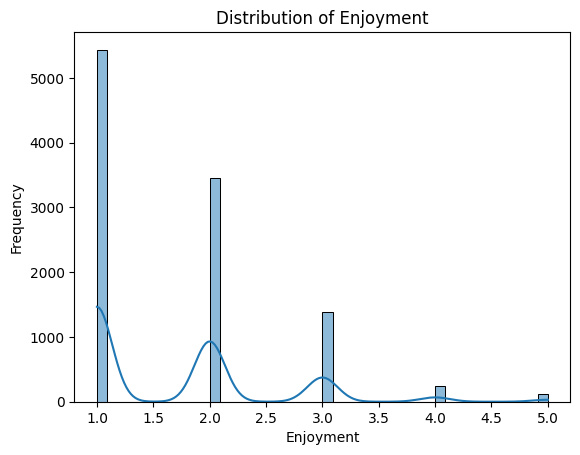

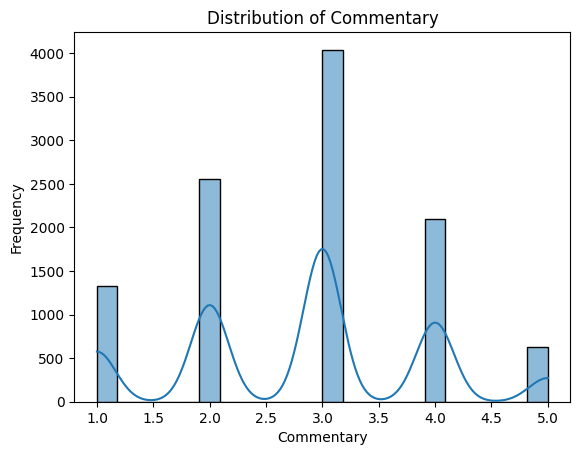

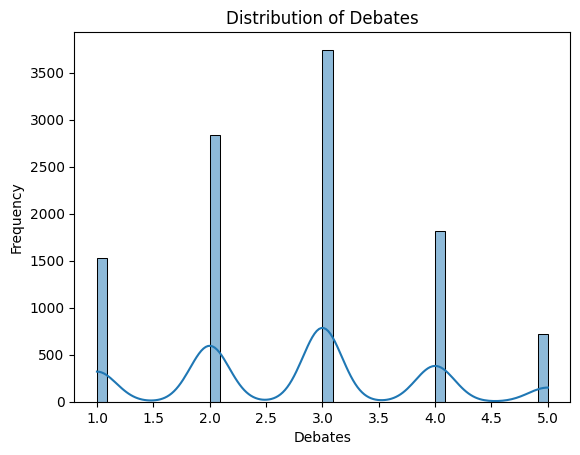

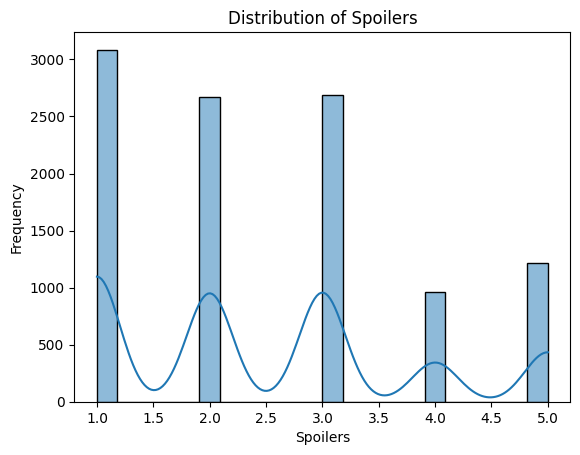

In [ ]:
# Histograms for key numerical variables
for column in ['Enjoyment', 'Commentary', 'Debates', 'Spoilers']:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The following code generates a correlation matrix heatmap for numerical variables in a dataset. It begins by selecting columns of numerical data types (float and int) from the dataset. It then calculates the correlation matrix for these numerical columns with **numerical_data.corr()**. Using the **seaborn** library, it creates a heatmap to visualize this correlation matrix, with annotations indicating the correlation values and a color map ('coolwarm') to differentiate positive and negative correlations. The plot provides a clear visual representation of the relationships between numerical variables in the dataset.

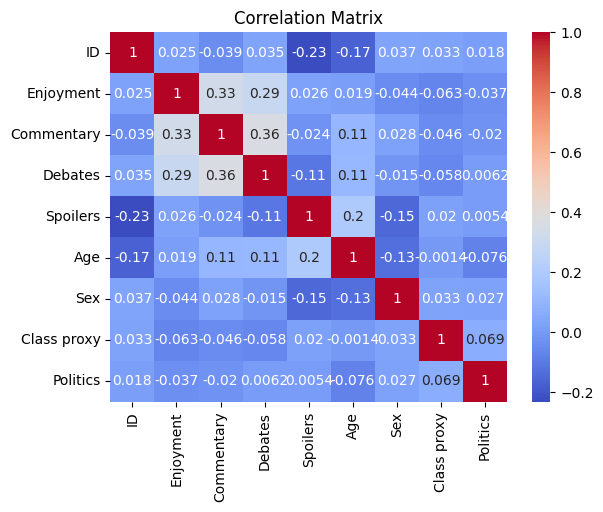

In [ ]:
# Correlation matrix of numerical variables
numerical_data = data.select_dtypes(include=['float', 'int'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The cross-tabulation below examines the relationship between the participants' sex and their engagement in debates. It creates a table that shows the count of participants of each sex (e.g., male and female) who have different levels of engagement in debates. The heatmap visualizes this table, highlighting any noticeable differences in debate engagement between sexes.

Debates  1.0   2.0   3.0  4.0  5.0
Sex                               
1.0      697  1306  1929  882  321
2.0      814  1498  1775  913  385
3.0       16    31    39   19   11


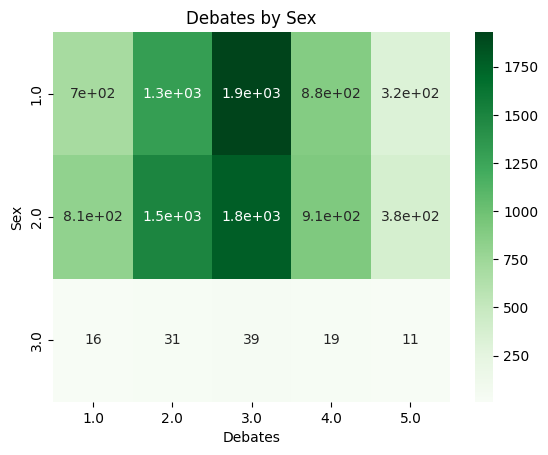

In [ ]:
# Cross-tabulation of Sex and Debates
sex_debates_ct = pd.crosstab(data['Sex'], data['Debates'])
print(sex_debates_ct)

# Heatmap of the cross-tabulation
sns.heatmap(sex_debates_ct, annot=True, cmap='Greens')
plt.title('Debates by Sex')
plt.ylabel('Sex')
plt.xlabel('Debates')
plt.show()

The cross-tabulation below explores the relationship between the participants' class proxy (a socioeconomic indicator) and their exposure to spoilers. It generates a table showing the count of participants from each class proxy level who have different levels of exposure to spoilers. The heatmap visually represents this data, helping to identify any patterns or trends in spoiler exposure across different socioeconomic classes.

Spoilers     1.0  2.0  3.0  4.0  5.0
Class proxy                         
1.0          184  146  186   43   87
2.0          368  248  282   91  136
3.0          775  771  685  227  270
4.0          930  789  849  318  383
5.0          691  610  570  222  262
6.0           87   76   86   51   46
7.0           50   34   33   14   36


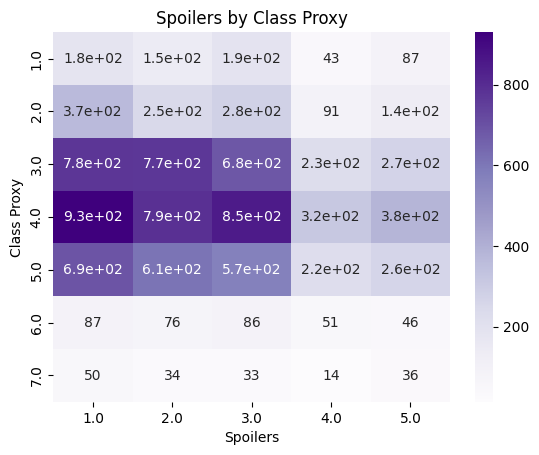

In [ ]:
# Cross-tabulation of Class proxy and Spoilers
class_spoilers_ct = pd.crosstab(data['Class proxy'], data['Spoilers'])
print(class_spoilers_ct)

# Heatmap of the cross-tabulation
sns.heatmap(class_spoilers_ct, annot=True, cmap='Purples')
plt.title('Spoilers by Class Proxy')
plt.ylabel('Class Proxy')
plt.xlabel('Spoilers')
plt.show()


The cross-tabulation analyzes the relationship between the participants' political views and their engagement in commentary. It creates a table displaying the count of participants with different political views who have varying levels of engagement in commentary. The heatmap provides a visual representation of this data, allowing for easy identification of any significant correlations between political views and commentary engagement.

Commentary  1.0   2.0   3.0  4.0  5.0
Politics                             
1.0         188   307   512  286   77
2.0         496  1090  1883  951  236
3.0         315   587   803  405  131
4.0         158   296   463  284   96
5.0          20    27    41   18   14
6.0         148   248   336  148   72


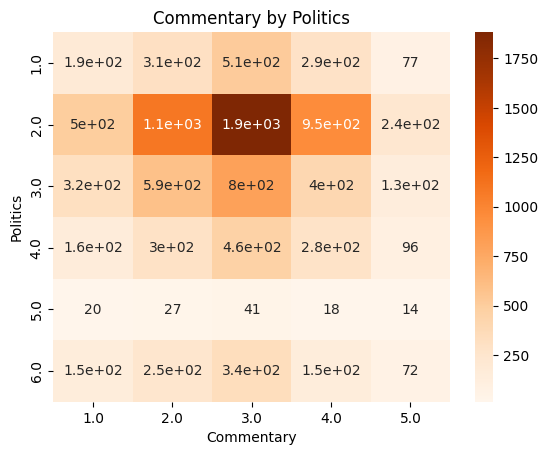

In [ ]:
# Cross-tabulation of Politics and Commentary
politics_commentary_ct = pd.crosstab(data['Politics'], data['Commentary'])
print(politics_commentary_ct)

# Heatmap of the cross-tabulation
sns.heatmap(politics_commentary_ct, annot=True, cmap='Oranges')
plt.title('Commentary by Politics')
plt.ylabel('Politics')
plt.xlabel('Commentary')
plt.show()


### Cleaning Demographic Data

In [7]:
# Fill missing values or drop rows if necessary
# Replacing missing values in 'Age' with the mean of the column
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Forward filling missing values in 'Sex' with the previous value
data['Sex'].fillna(method='ffill', inplace=True)

# Replacing missing values in 'Class proxy' with the most frequent value (mode)
data['Class proxy'].fillna(data['Class proxy'].mode()[0], inplace=True)

# Replacing missing values in 'Politics' with the most frequent value (mode)
data['Politics'].fillna(data['Politics'].mode()[0], inplace=True)

# Convert columns to appropriate data types
# Converting 'Sex' to a categorical data type
data['Sex'] = data['Sex'].astype('category')

# Converting 'Class proxy' to a categorical data type
data['Class proxy'] = data['Class proxy'].astype('category')

# Converting 'Politics' to a categorical data type
data['Politics'] = data['Politics'].astype('category')


<ipython-input-7-3019c8c6fd4e>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Sex'].fillna(method='ffill', inplace=True)


### Analyzing Age Distribution

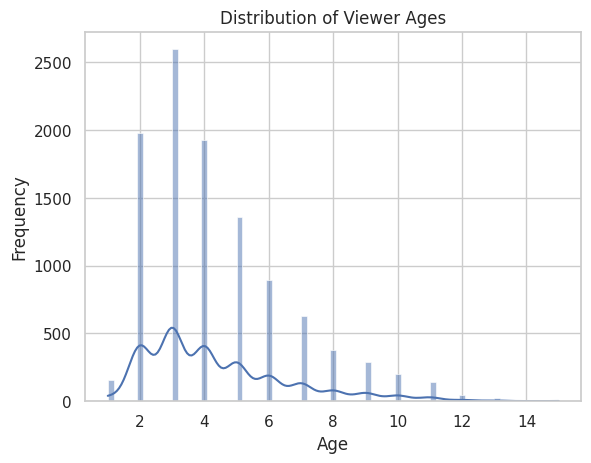

In [8]:
# Plotting the age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Viewer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of ages among the viewers. It appears that the viewer age is somewhat normally distributed with a possible skew towards younger ages, indicating that "Game of Thrones" may have a younger audience demographic.

### Sex Distribution and Its Impact on Enjoyment

Sex
2.0    5385
1.0    5137
3.0     116
Name: count, dtype: int64


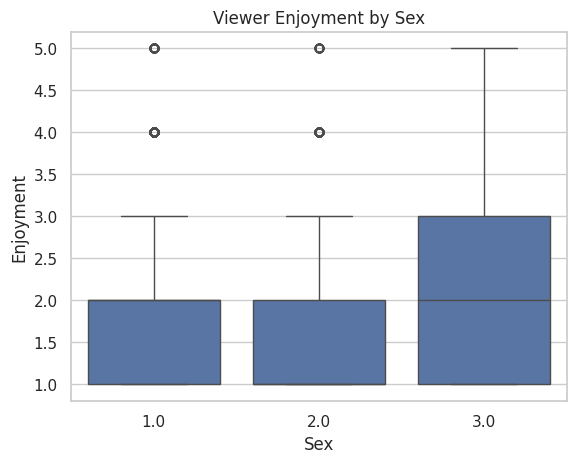

In [9]:
# Counting the number of viewers by sex
sex_counts = data['Sex'].value_counts()
print(sex_counts)

# Boxplot of Enjoyment by Sex
sns.boxplot(x='Sex', y='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Sex')
plt.xlabel('Sex')
plt.ylabel('Enjoyment')
plt.show()


The viewer counts from the above output show a nearly even distribution between the first two sex categories, indicating a balanced demographic. The boxplot reveals that enjoyment ratings are relatively consistent across the larger groups (1.0 and 2.0), with some variability and outliers. The smaller group (3.0) shows more variability, likely due to the smaller sample size.

### Exploring Geographic Distribution

Live
United States     3227
United Kingdom    1310
Spain             1056
Finland            513
Germany            501
                  ... 
Bhutan               1
Azerbaijan           1
Western Sahara       1
Isle of man          1
ndia                 1
Name: count, Length: 134, dtype: int64


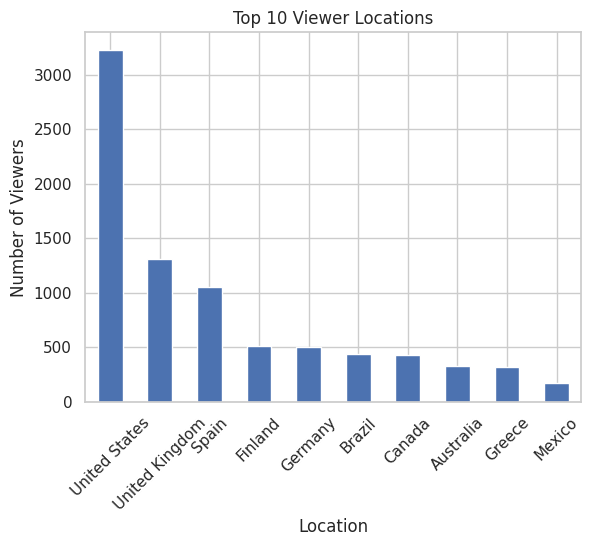

In [10]:
# Viewer count by geographic location (assuming 'Live' column contains this info)
location_counts = data['Live'].value_counts()
print(location_counts)

# Visualizing top 10 locations
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Viewer Locations')
plt.xlabel('Location')
plt.ylabel('Number of Viewers')
plt.xticks(rotation=45)
plt.show()


The dataset includes viewers primarily from US, UK, Spain, Finland. US has the highest number of viewers, followed by the United Kingdom and Spain.

### Analyzing Class and Politics

Viewer Class Distribution:
 Class proxy
4.0    3271
3.0    2728
5.0    2355
2.0    1125
1.0     646
6.0     346
7.0     167
Name: count, dtype: int64


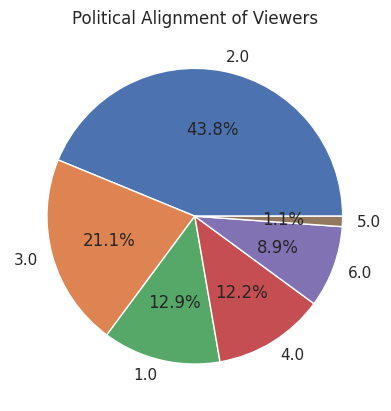

In [11]:
# Analyzing viewer class distribution
class_distribution = data['Class proxy'].value_counts()
print("Viewer Class Distribution:\n", class_distribution)

# Plotting political alignment of viewers
politics_counts = data['Politics'].value_counts()
politics_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Political Alignment of Viewers')
plt.ylabel('')
plt.show()


The majority of viewers fall into class categories '2.0' and '3.0', suggesting a significant portion of the audience comes from these socio-economic classes. Fewer viewers are in the lower classes ('5.0' and '6.0').

Below are a few more EDA plots for various analysis.

Analysis of the Plots:
* **Spoilers Ratings by Sex**: This violin plot shows the distribution of "Spoilers" ratings across different sexes. Each violin represents a sex category, and the width of the violin at different levels shows the density of ratings at those levels. The plot reveals that for all three sex categories, the ratings are spread across the range but have distinct modes, suggesting that different sexes have varying opinions about spoilers. The wider sections indicate where the ratings are most concentrated.
* **Commentary Ratings by Politics**: This plot illustrates the distribution of "Commentary" ratings across various political categories. The shapes of the violins suggest differences in how different political groups rate the commentary. For example, certain political categories show a more concentrated range of ratings, while others have a broader spread, indicating more variability in opinions about commentary within those groups.
* **Spoilers Ratings Distribution by Sex**: The histogram presents the distribution of "Spoilers" ratings with a breakdown by sex. It stacks the ratings by sex, allowing us to compare how different sexes rate spoilers. The plot suggests that certain ratings are more popular among specific sexes, with some ratings being predominantly chosen by one sex over the others.
* **Distribution of Sex**: The count plot shows the distribution of respondents by sex. It indicates that the dataset has a fairly balanced representation of sexes 1.0 and 2.0, while sex 3.0 is underrepresented. This distribution provides context for interpreting the other plots that compare ratings by sex.
* **Pairplot of Age and Enjoyment Colored by Sex**: This pairplot provides a visual comparison of "Age" and "Enjoyment" across different sexes. The scatter plots and density plots show how enjoyment levels vary by age and how these patterns differ between sexes. For instance, the plot reveals clustering of enjoyment ratings at specific age levels, with potential differences in distribution across sexes.
* **Distribution of Enjoyment Ratings**: This histogram shows the distribution of "Enjoyment" ratings among respondents. It highlights the frequency of each rating level, revealing that certain enjoyment levels are more common than others. The plot suggests that lower enjoyment ratings are more prevalent, with a few respondents giving higher ratings.
* **Debates Ratings by Politics**: The boxplot shows how "Debates" ratings vary across different political categories. The height of each box and the length of the whiskers indicate the range of ratings, while the median line within each box shows the central tendency. Some political groups appear to have a broader range of opinions on debates, while others are more uniform in their ratings.
* **Commentary Ratings by Sex**: This boxplot presents the distribution of "Commentary" ratings by sex. It shows the central tendency and spread of ratings for each sex category. The plot reveals potential differences in how each sex rates commentary, with some sexes showing higher median ratings and others displaying a wider range of opinions.
* **Distribution of Commentary Ratings**: This histogram provides an overview of how "Commentary" ratings are distributed across all respondents. The peaks and troughs in the histogram suggest that certain commentary ratings are more common, indicating that respondents tend to cluster around specific rating values.
* **Age vs Enjoyment with Class Proxy**: The scatter plot visualizes the relationship between "Age" and "Enjoyment," with points colored by "Class proxy." The plot shows how enjoyment levels vary with age and how this relationship is influenced by the class proxy. It reveals potential clusters where certain age groups within specific classes tend to have similar enjoyment ratings.

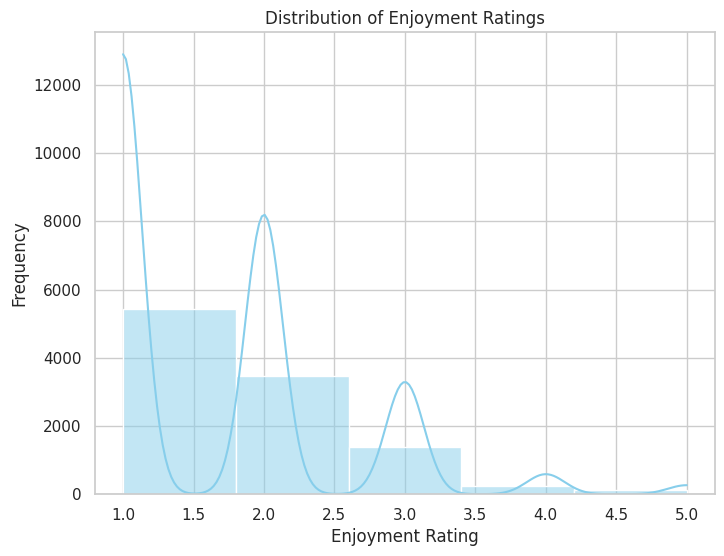

<ipython-input-15-99a929ba798a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Commentary', data=data, palette='pastel')


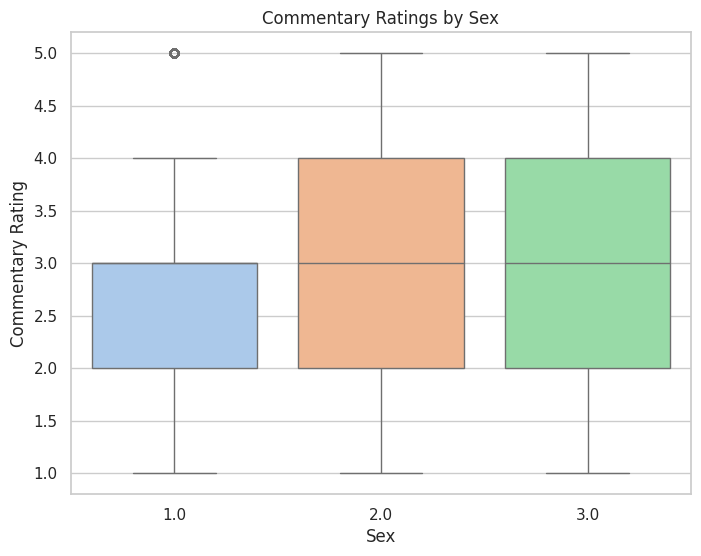

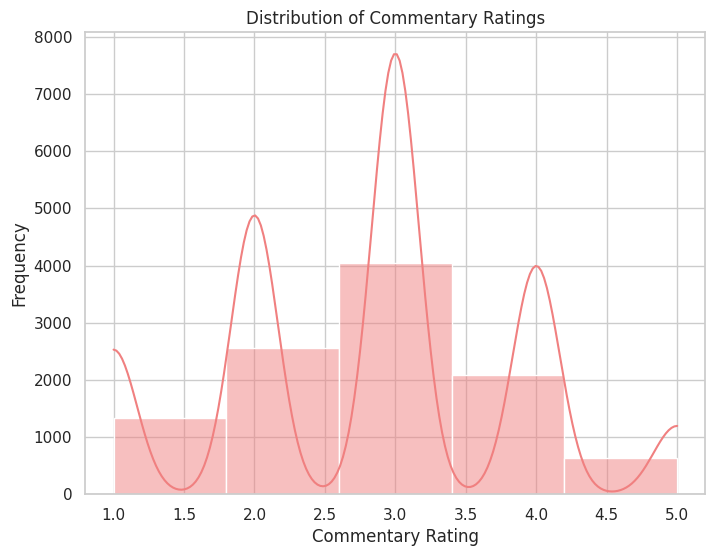

<ipython-input-15-99a929ba798a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Politics', y='Commentary', data=data, palette='pastel')


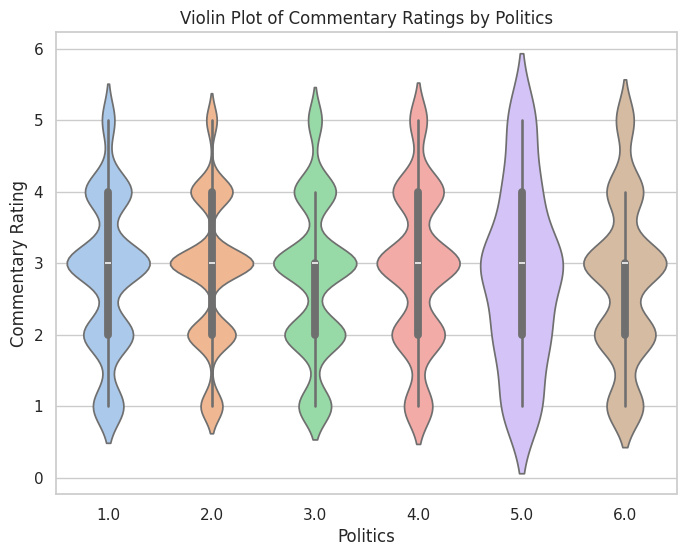

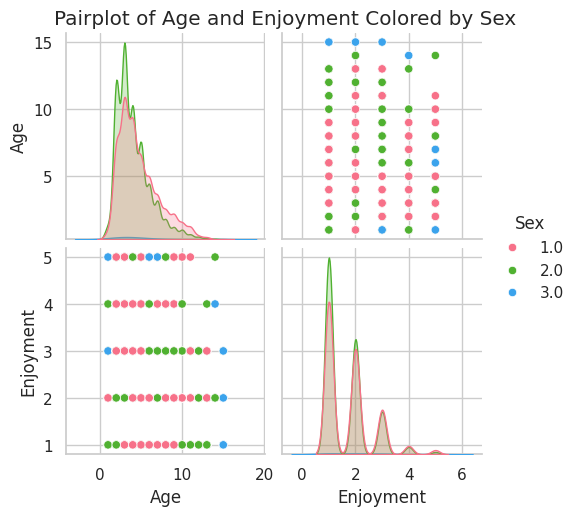

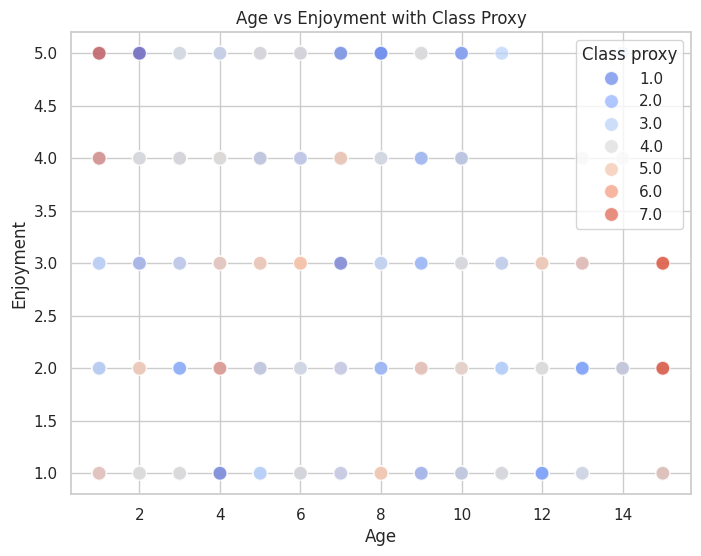

<ipython-input-15-99a929ba798a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Politics', y='Debates', data=data, palette='Set3')


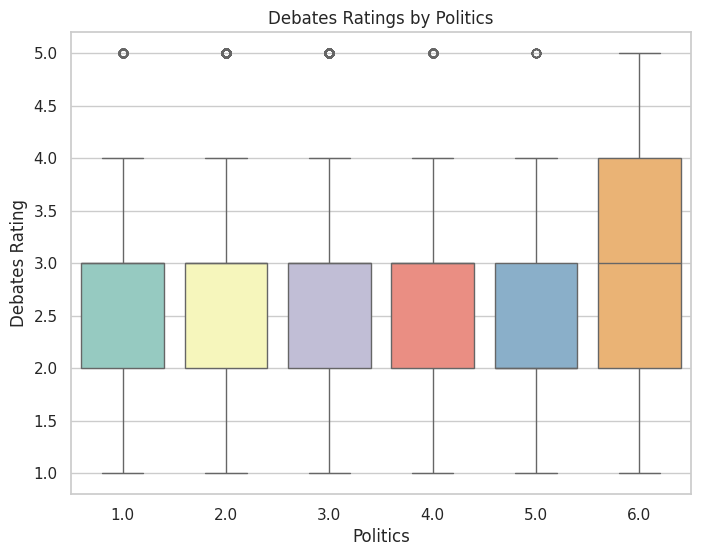

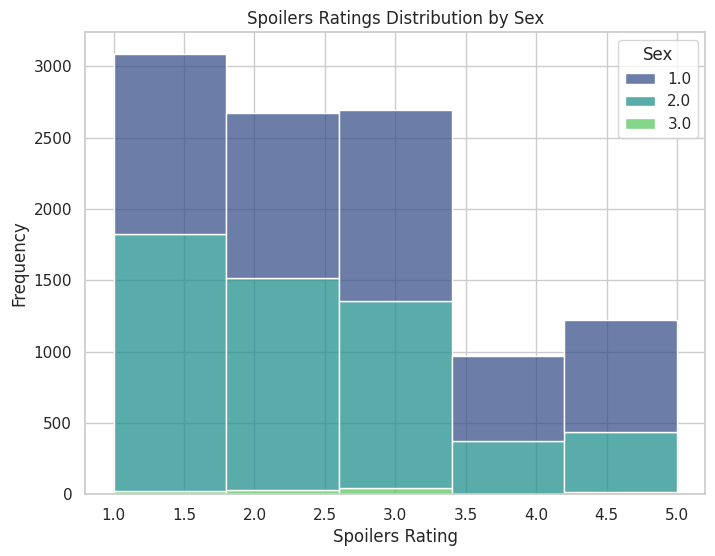

<ipython-input-15-99a929ba798a>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='pastel')


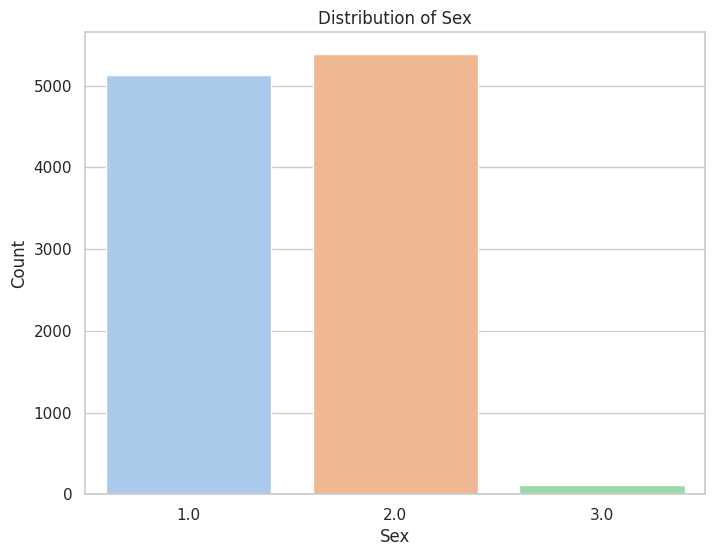

<ipython-input-15-99a929ba798a>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Spoilers', data=data, palette='muted')


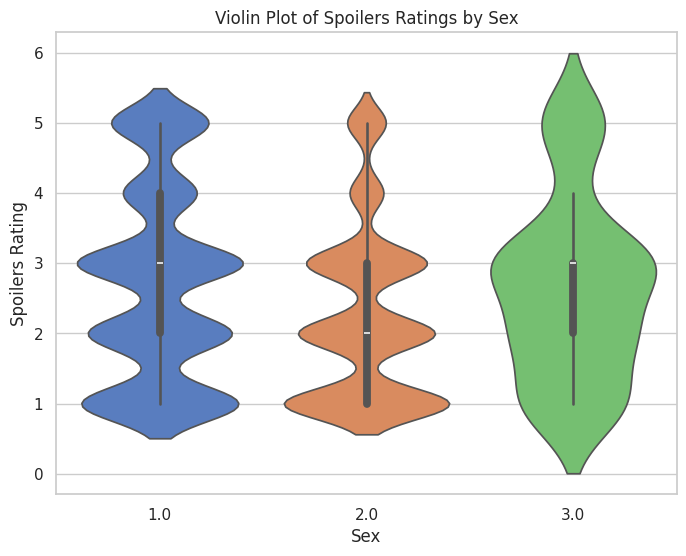

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Plot distribution of 'Enjoyment' ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Enjoyment'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Enjoyment Ratings')
plt.xlabel('Enjoyment Rating')
plt.ylabel('Frequency')
plt.savefig('enjoyment_distribution.png')
plt.show()


# Boxplot of 'Commentary' ratings by 'Sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Commentary', data=data, palette='pastel')
plt.title('Commentary Ratings by Sex')
plt.xlabel('Sex')
plt.ylabel('Commentary Rating')
plt.savefig('commentary_ratings_by_sex.png')
plt.show()

# Plot distribution of 'Commentary' ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Commentary'], bins=5, kde=True, color='lightcoral')
plt.title('Distribution of Commentary Ratings')
plt.xlabel('Commentary Rating')
plt.ylabel('Frequency')
plt.savefig('commentary_distribution.png')
plt.show()

# Violin plot for 'Commentary' ratings by 'Politics'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Politics', y='Commentary', data=data, palette='pastel')
plt.title('Violin Plot of Commentary Ratings by Politics')
plt.xlabel('Politics')
plt.ylabel('Commentary Rating')
plt.savefig('violin_commentary_ratings_by_politics.png')
plt.show()

# Pairplot for 'Age' and 'Enjoyment' colored by 'Sex'
sns.pairplot(data[['Age', 'Enjoyment', 'Sex']], hue='Sex', palette='husl')
plt.suptitle('Pairplot of Age and Enjoyment Colored by Sex', y=1.02)
plt.savefig('pairplot_age_enjoyment_sex.png')
plt.show()

# Scatter plot of 'Age' vs 'Enjoyment' with hue as 'Class proxy'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Enjoyment', hue='Class proxy', data=data, palette='coolwarm', s=100, alpha=0.7)
plt.title('Age vs Enjoyment with Class Proxy')
plt.xlabel('Age')
plt.ylabel('Enjoyment')
plt.savefig('age_vs_enjoyment_with_class_proxy.png')
plt.show()

# Boxplot of 'Debates' ratings by 'Politics'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Politics', y='Debates', data=data, palette='Set3')
plt.title('Debates Ratings by Politics')
plt.xlabel('Politics')
plt.ylabel('Debates Rating')
plt.savefig('debates_ratings_by_politics.png')
plt.show()

# Histogram of 'Spoilers' with hue as 'Sex'
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Spoilers', hue='Sex', multiple='stack', palette='viridis', bins=5)
plt.title('Spoilers Ratings Distribution by Sex')
plt.xlabel('Spoilers Rating')
plt.ylabel('Frequency')
plt.savefig('spoilers_distribution_by_sex.png')
plt.show()

# Countplot of 'Sex' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('sex_distribution.png')
plt.show()

# Violin plot for 'Spoilers' ratings by 'Sex'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Spoilers', data=data, palette='muted')
plt.title('Violin Plot of Spoilers Ratings by Sex')
plt.xlabel('Sex')
plt.ylabel('Spoilers Rating')
plt.savefig('violin_spoilers_ratings_by_sex.png')
plt.show()



## Performing Sentiment Analysis

We'll use the TextBlob library to perform sentiment analysis on viewer responses. TextBlob provides a simple API to access common text-processing operations including sentiment analysis.

In [ ]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
data.columns

Index(['ID', 'Enjoyment', 'Commentary', 'Explain 1 & 2', 'Debates',
       'Explain 4', 'Spoilers', 'Explain 6', 'Ways of watching',
       'Favourite character', 'Favourite survivor', 'Kind of story',
       'Book importance', 'Other stories', 'Lands peoples', 'Fantasy roles',
       'Most memorable', 'Most uncomfortable', 'Other activities', 'Age',
       'Sex', 'Class proxy', 'Politics', 'Live', 'Personal',
       'Winter is coming', 'Random'],
      dtype='object')

In [ ]:
# Fill missing values with an empty string to avoid errors during processing
data['Explain 1 & 2'].fillna('', inplace=True)
data['Explain 4'].fillna('', inplace=True)
data['Explain 6'].fillna('', inplace=True)
data['Ways of watching'].fillna('', inplace=True)
data['Favourite character'].fillna('', inplace=True)
data['Favourite survivor'].fillna('', inplace=True)
data['Book importance'].fillna('', inplace=True)
data['Other stories'].fillna('', inplace=True)
data['Lands peoples'].fillna('', inplace=True)
data['Most memorable'].fillna('', inplace=True)
data['Most uncomfortable'].fillna('', inplace=True)
data['Other activities'].fillna('', inplace=True)
data['Personal'].fillna('', inplace=True)
data['Winter is coming'].fillna('', inplace=True)

In [ ]:
# Apply the sentiment analysis function to the textual columns
data['Sentiment Explain 1 & 2'] = data['Explain 1 & 2'].apply(calculate_sentiment)
data['Sentiment Explain 4'] = data['Explain 4'].apply(calculate_sentiment)

data['Sentiment Explain 6'] = data['Explain 6'].apply(calculate_sentiment)
data['Sentiment Ways of watching'] = data['Ways of watching'].apply(calculate_sentiment)
data['Sentiment Favourite character'] = data['Favourite character'].apply(calculate_sentiment)
data['Sentiment Favourite survivor'] = data['Favourite survivor'].apply(calculate_sentiment)
data['Sentiment Book importance'] = data['Book importance'].apply(calculate_sentiment)
data['Sentiment Other stories'] = data['Other stories'].apply(calculate_sentiment)
data['Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_sentiment)
data['Sentiment Most memorable'] = data['Most memorable'].apply(calculate_sentiment)
data['Sentiment Most uncomfortable'] = data['Most uncomfortable'].apply(calculate_sentiment)
data['Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_sentiment)

data['Sentiment Personal'] = data['Personal'].apply(calculate_sentiment)
data['Sentiment Winter is coming'] = data['Winter is coming'].apply(calculate_sentiment)

In [ ]:
data.head()

,ID,Enjoyment,Commentary,Explain 1 & 2,Debates,Explain 4,Spoilers,Explain 6,Ways of watching,Favourite character,...,Sentiment Ways of watching,Sentiment Favourite character,Sentiment Favourite survivor,Sentiment Book importance,Sentiment Other stories,Sentiment Lands peoples,Sentiment Most memorable,Sentiment Most uncomfortable,Sentiment Personal,Sentiment Winter is coming
0,1,1.0,2.0,"To follow and enjoy (""extremely""): That's just...",5.0,I haven't followed so cannot answer.,1.0,Well this wasn't actually an spoiler but my ow...,"Alone, several episodes at a time. I watched a...",Tyrion Lannister is one of my favorites (as is...,...,0.208333,0.277778,0.276429,0.000000,0.01250,0.2200,0.035714,-0.023750,0.286000,-0.000568
1,2,1.0,3.0,,4.0,,3.0,,"Alone, multiple episodes at the time. I´ll try...",I´ll like almost everybody in the serious. I u...,...,0.233333,0.244444,0.235000,-0.066667,0.00000,0.0000,0.000000,-0.280000,0.408333,0.200000
2,3,1.0,5.0,I'm a fan of the books and can't wait for the ...,5.0,,3.0,,I watch it with my husband one episode at a ti...,"Arya, Jon and Tyrion. I read from a Martin's i...",...,0.000000,0.700000,0.000000,0.325000,-0.09375,-0.1625,0.000000,0.000000,0.150000,-0.025000
3,4,1.0,3.0,Game of Thrones is probably the most amazing f...,3.0,What happens at next season.,4.0,,"Alone, and very moment that it's available. I ...","I just love Tyrion, he's so smart, funny and b...",...,0.300000,0.441071,0.000000,0.400000,0.00000,0.0000,0.000000,-0.311667,0.000000,0.000000
4,5,4.0,3.0,"Too many other things to watch, and the show's...",3.0,"The debates around representation and genre, n...",2.0,I have a friend on Facebook who is militantly ...,"With others, one episode at a time, delayed un...",,...,0.200000,0.000000,0.000000,0.112500,-0.10000,0.0000,0.000000,-0.281250,-0.145238,-0.016667


In [ ]:
# List of sentiment columns
sentiment_columns = [
    'Sentiment Explain 1 & 2', 'Sentiment Explain 4', 'Sentiment Explain 6',
    'Sentiment Ways of watching', 'Sentiment Favourite character', 'Sentiment Favourite survivor',
    'Sentiment Book importance', 'Sentiment Other stories', 'Sentiment Lands peoples',
    'Sentiment Most memorable', 'Sentiment Most uncomfortable', 'Sentiment Personal',
    'Sentiment Winter is coming'
]

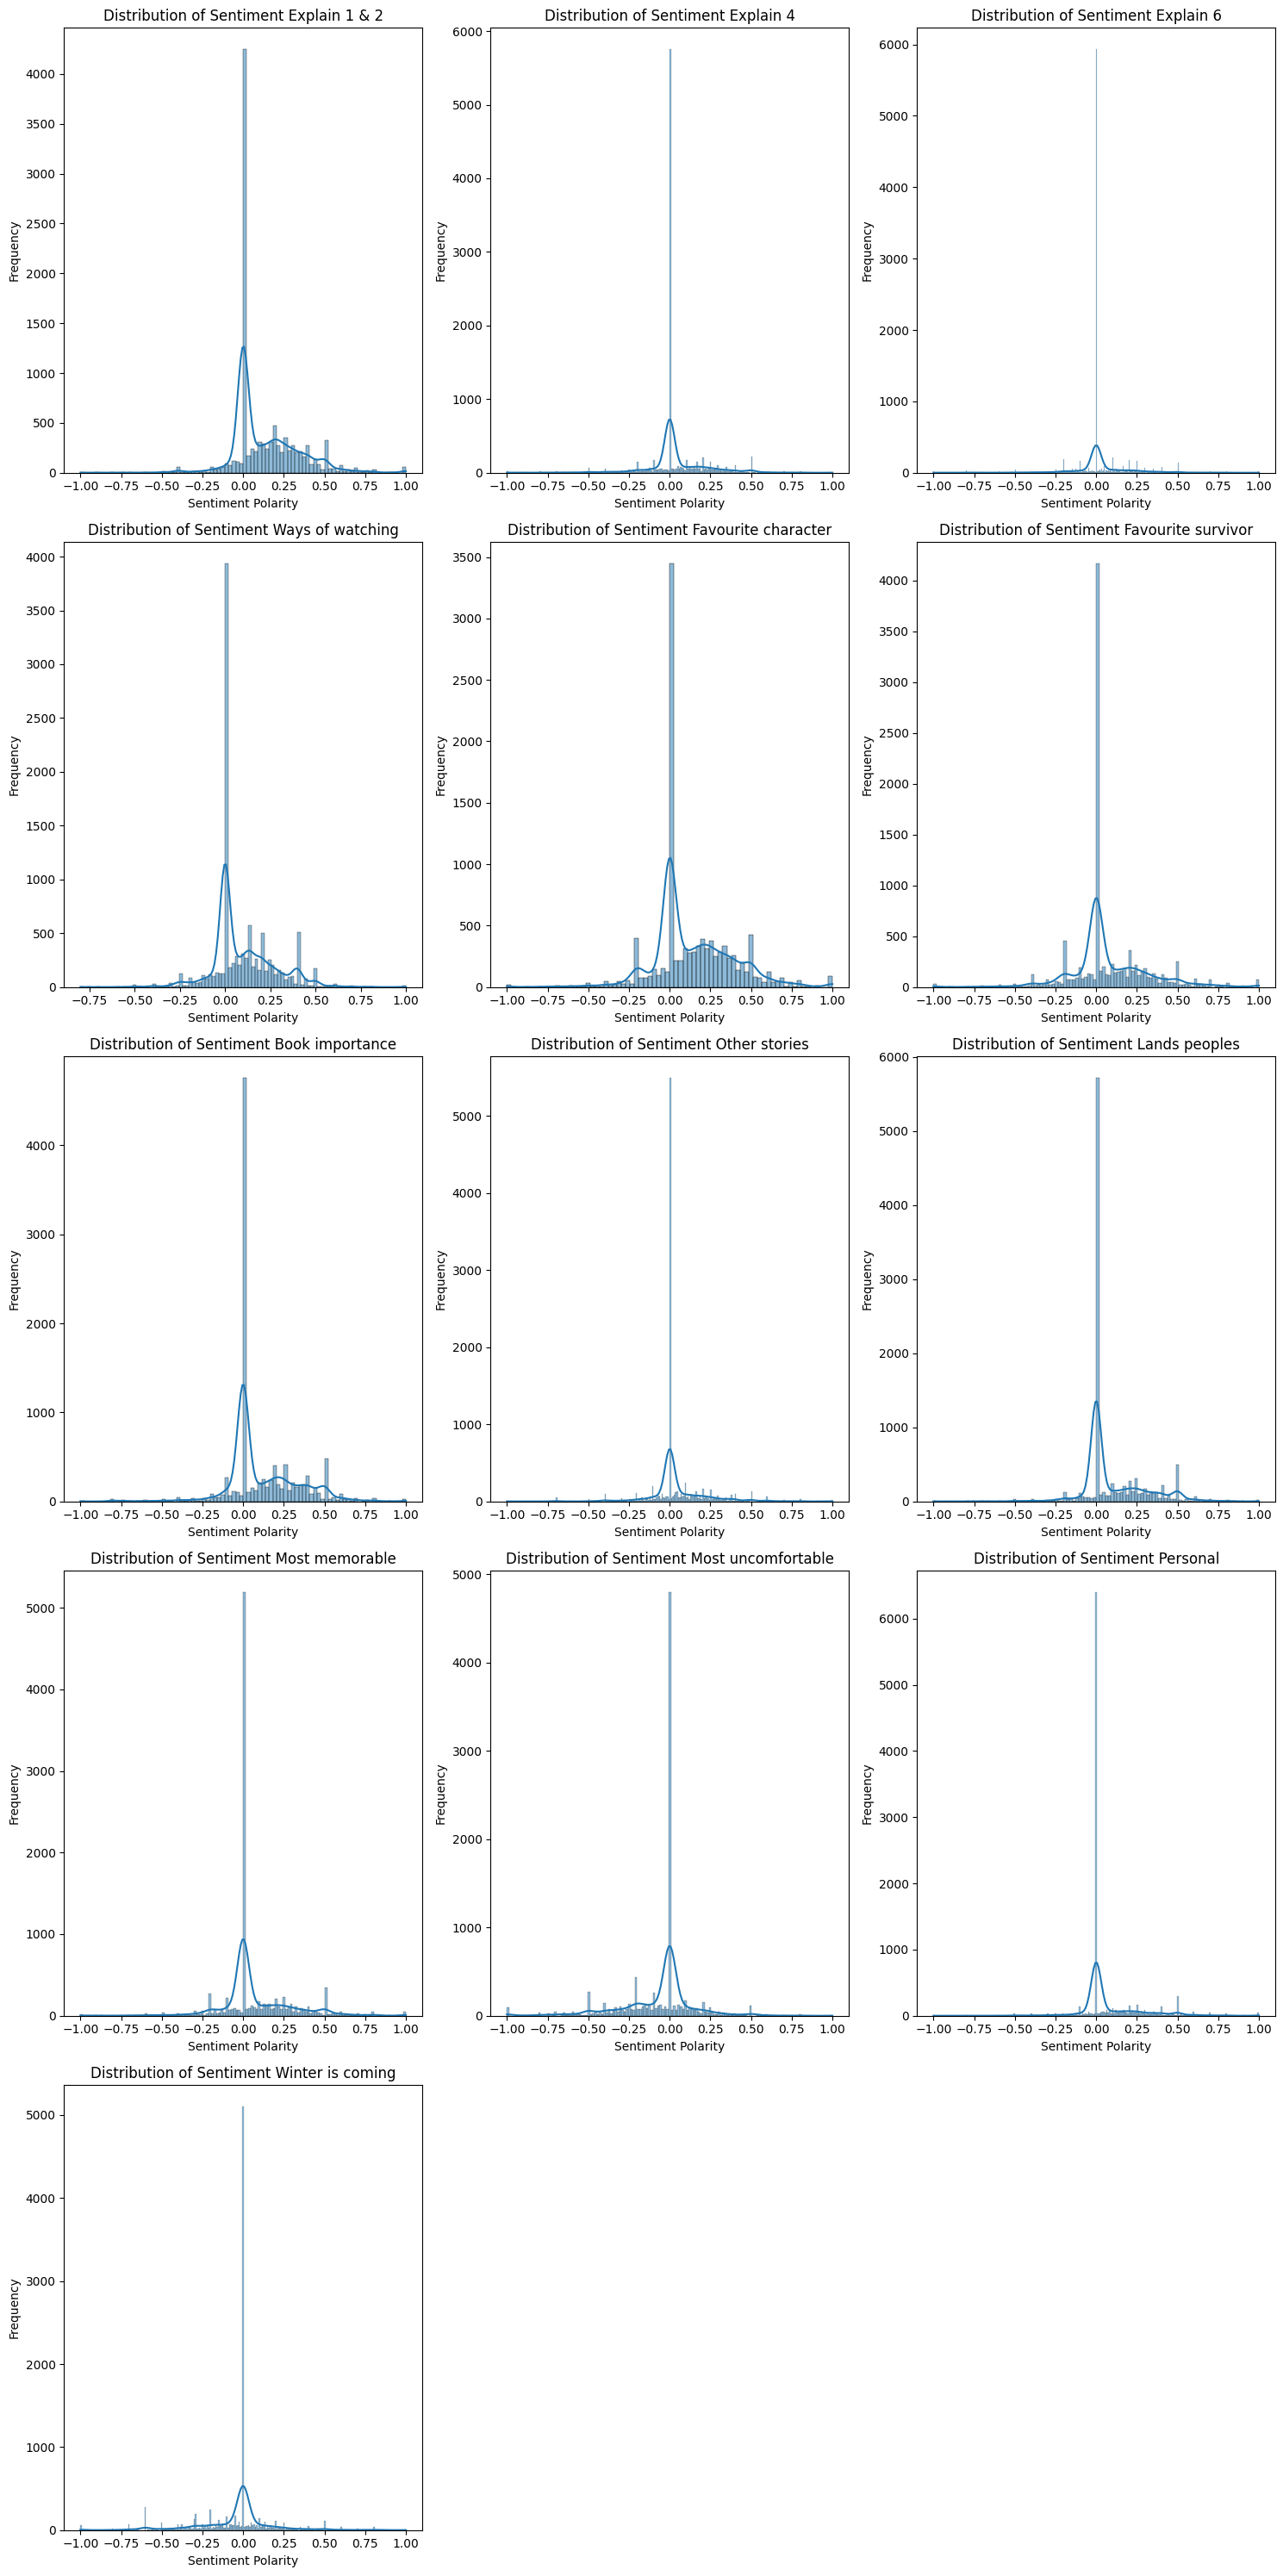

In [ ]:
# Creating the plots for all sentiment columns
fig, axes = plt.subplots(nrows=(len(sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, sentiment_column in enumerate(sentiment_columns):
    sns.histplot(data[sentiment_column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {sentiment_column}')
    axes[i].set_xlabel('Sentiment Polarity')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Here’s a detailed analysis of the plots:

- Explain 1 & 2: The distribution is sharply peaked around a neutral sentiment, with very few responses veering into either positive or negative territory. This could suggest that while viewers have opinions on the topics in question, their emotional reactions are not particularly strong, or the language used is more factual than emotional.
- Explain 4: Similar to the first, this plot also indicates a strong concentration of neutral sentiments, with sparse positive and negative responses.
- Explain 6: Again, there's a strong peak at neutrality, with some lean towards positive sentiment. This may suggest that when viewers do express emotions, they tend to be slightly positive.
Ways of Watching: This plot shows a neutral sentiment peak, suggesting that viewers’ comments on how they watch the show do not carry strong emotional language.
- Favourite Character: Viewers show a strong neutral sentiment when discussing their favorite character, which could imply that the way they talk about their favorites is not heavily laden with emotional language.
- Favourite Survivor: As with favorite characters, the sentiment is overwhelmingly neutral. This neutrality might be due to discussions of favorite survivors being more analytical than emotional.
Book Importance: The sentiment peaks at neutral, suggesting that discussions about the importance of the books in relation to the series are not highly emotional.
- Other Stories: Neutral sentiment dominates, which may indicate a factual or neutral discussion of other stories compared to "Game of Thrones".
- Lands Peoples: The sentiment is neutral with a slight skew towards positive. This could indicate that viewers have a mild positive emotional response when discussing the different lands and peoples in the series.
- Most Memorable: The sentiment here is largely neutral with a minor positive sentiment, implying that while viewers remember certain aspects vividly, their language may not be overtly emotional.
- Most Uncomfortable: Sentiment is largely neutral, with a very slight negative skew. This is interesting as discomfort could be expected to elicit a stronger negative sentiment, yet the language viewers use may be restrained.
- Personal: Viewers' personal comments maintain a neutral sentiment. Personal anecdotes or connections to the series may be explained in neutral terms, perhaps reflecting a diverse array of personal experiences.
- Winter is Coming: The sentiment is mainly neutral, which might indicate that the iconic phrase often sparks discussion without strong emotional language.

We will analyse sentiment using transformers which has been explained in the subsequent cells

In [ ]:
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline from HuggingFace
sentiment_pipeline = pipeline('sentiment-analysis', device=0)

# Define a function to calculate sentiment polarity using HuggingFace
def calculate_hf_sentiment(text):
    if pd.isnull(text):
        return None
    result = sentiment_pipeline(text)
    # Convert HuggingFace output to a similar scale as TextBlob (-1 to 1)
    if result[0]['label'] == 'NEGATIVE':
        return -result[0]['score']
    else:
        return result[0]['score']

# Apply the sentiment analysis function to the textual columns using HuggingFace
data['HF_Sentiment Explain 1 & 2'] = data['Explain 1 & 2'].apply(calculate_hf_sentiment)
data['HF_Sentiment Explain 4'] = data['Explain 4'].apply(calculate_hf_sentiment)
data['HF_Sentiment Explain 6'] = data['Explain 6'].apply(calculate_hf_sentiment)
data['HF_Sentiment Ways of watching'] = data['Ways of watching'].apply(calculate_hf_sentiment)
data['HF_Sentiment Favourite character'] = data['Favourite character'].apply(calculate_hf_sentiment)
data['HF_Sentiment Favourite survivor'] = data['Favourite survivor'].apply(calculate_hf_sentiment)
data['HF_Sentiment Book importance'] = data['Book importance'].apply(calculate_hf_sentiment)
data['HF_Sentiment Other stories'] = data['Other stories'].apply(calculate_hf_sentiment)
data['HF_Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_hf_sentiment)
data['HF_Sentiment Most memorable'] = data['Most memorable'].apply(calculate_hf_sentiment)
data['HF_Sentiment Most uncomfortable'] = data['Most uncomfortable'].apply(calculate_hf_sentiment)
data['HF_Sentiment Personal'] = data['Personal'].apply(calculate_hf_sentiment)
data['HF_Sentiment Winter is coming'] = data['Winter is coming'].apply(calculate_hf_sentiment)

# Display the first few rows of the updated DataFrame to check the sentiment scores
print(data[['Explain 1 & 2', 'HF_Sentiment Explain 1 & 2', 'Explain 4', 'HF_Sentiment Explain 4']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                       Explain 1 & 2  \
0  To follow and enjoy ("extremely"): That's just...   
1                                                      
2  I'm a fan of the books and can't wait for the ...   
3  Game of Thrones is probably the most amazing f...   
4  Too many other things to watch, and the show's...   

   HF_Sentiment Explain 1 & 2  \
0                    0.999679   
1                    0.748121   
2                    0.993728   
3                    0.999427   
4                   -0.999764   

                                           Explain 4  HF_Sentiment Explain 4  
0               I haven't followed so cannot answer.               -0.999382  
1                                                                   0.748121  
2                                                                   0.748121  
3                       What happens at next season.                0.993213  
4  The debates around representation and genre, n...               -0

In [ ]:
# List of sentiment columns
hf_sentiment_columns = [
    'HF_Sentiment Explain 1 & 2',
    'HF_Sentiment Explain 4',
    'HF_Sentiment Explain 6',
    'HF_Sentiment Ways of watching',
    'HF_Sentiment Favourite character',
    'HF_Sentiment Favourite survivor',
    'HF_Sentiment Book importance',
    'HF_Sentiment Other stories',
    'HF_Sentiment Lands peoples',
    'HF_Sentiment Most memorable',
    'HF_Sentiment Most uncomfortable',
    'HF_Sentiment Personal',
    'HF_Sentiment Winter is coming'
]

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment polarity using VADER
def calculate_vader_sentiment(text):
    if pd.isnull(text):
        return None
    sentiment = analyzer.polarity_scores(text)
    # Return compound score which is a normalized score between -1 (most negative) and +1 (most positive)
    return sentiment['compound']

# Apply the sentiment analysis function to the textual columns using VADER
data['VADER_Sentiment Explain 1 & 2'] = data['Explain 1 & 2'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Explain 4'] = data['Explain 4'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Explain 6'] = data['Explain 6'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Ways of watching'] = data['Ways of watching'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Favourite character'] = data['Favourite character'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Favourite survivor'] = data['Favourite survivor'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Book importance'] = data['Book importance'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Other stories'] = data['Other stories'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Most memorable'] = data['Most memorable'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Most uncomfortable'] = data['Most uncomfortable'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Personal'] = data['Personal'].apply(calculate_vader_sentiment)
data['VADER_Sentiment Winter is coming'] = data['Winter is coming'].apply(calculate_vader_sentiment)

# Display the first few rows of the updated DataFrame to check the sentiment scores
print(data[['Explain 1 & 2', 'VADER_Sentiment Explain 1 & 2', 'Explain 4', 'VADER_Sentiment Explain 4']].head())


                                       Explain 1 & 2  \
0  To follow and enjoy ("extremely"): That's just...   
1                                                      
2  I'm a fan of the books and can't wait for the ...   
3  Game of Thrones is probably the most amazing f...   
4  Too many other things to watch, and the show's...   

   VADER_Sentiment Explain 1 & 2  \
0                         0.7636   
1                         0.0000   
2                         0.1655   
3                         0.8687   
4                        -0.3291   

                                           Explain 4  \
0               I haven't followed so cannot answer.   
1                                                      
2                                                      
3                       What happens at next season.   
4  The debates around representation and genre, n...   

   VADER_Sentiment Explain 4  
0                     0.0000  
1                     0.0000  
2               

In [ ]:
# List of VADER sentiment columns
vader_sentiment_columns = [
    'VADER_Sentiment Explain 1 & 2',
    'VADER_Sentiment Explain 4',
    'VADER_Sentiment Explain 6',
    'VADER_Sentiment Ways of watching',
    'VADER_Sentiment Favourite character',
    'VADER_Sentiment Favourite survivor',
    'VADER_Sentiment Book importance',
    'VADER_Sentiment Other stories',
    'VADER_Sentiment Lands peoples',
    'VADER_Sentiment Most memorable',
    'VADER_Sentiment Most uncomfortable',
    'VADER_Sentiment Personal',
    'VADER_Sentiment Winter is coming'
]


The segment below compares the sentiment scores for both Textblob, Transformers and Vader.

The analysis of sentiment scores using TextBlob, Transformer, and VADER reveals distinct differences in how these tools capture and represent viewer sentiments about "Game of Thrones." TextBlob's summary statistics show a central tendency around neutral sentiment, with means generally positive but close to zero. This suggests that while viewers' sentiments are slightly positive, they are not strongly polarized. The standard deviations, which range from approximately 0.17 to 0.25, indicate moderate variability, with most responses clustered around the median. The presence of outliers on both the positive and negative sides points to occasional extreme sentiments, but the narrow interquartile ranges (IQRs) suggest that most sentiments are near the neutral mark. This makes TextBlob useful for understanding general sentiment trends, reflecting moderate and balanced opinions.

In contrast, Transformer sentiment scores show a broader and more polarized distribution. The means of Transformer sentiments vary widely, with some categories showing high positive or negative values, indicating strong opinions on certain aspects. The higher standard deviations, around 0.90 for several columns, reflect substantial variability in sentiments. Quartile analysis reveals a tendency towards extreme sentiments, with many medians close to either -0.75 or 0.75, highlighting a bimodal distribution. Similarly, VADER sentiment analysis shows a mix of neutral, positive, and negative sentiments but tends to have a slightly higher central tendency towards positive sentiment in certain categories. VADER also captures significant variability in sentiments, with standard deviations ranging from 0.35 to 0.46 and notable extreme values. VADER's analysis provides a balanced view, capturing both neutral and strong opinions effectively. This comparison highlights how different sentiment analysis tools can provide varying insights into the same dataset, offering a comprehensive view of viewer sentiments related to different aspects of "Game of Thrones."

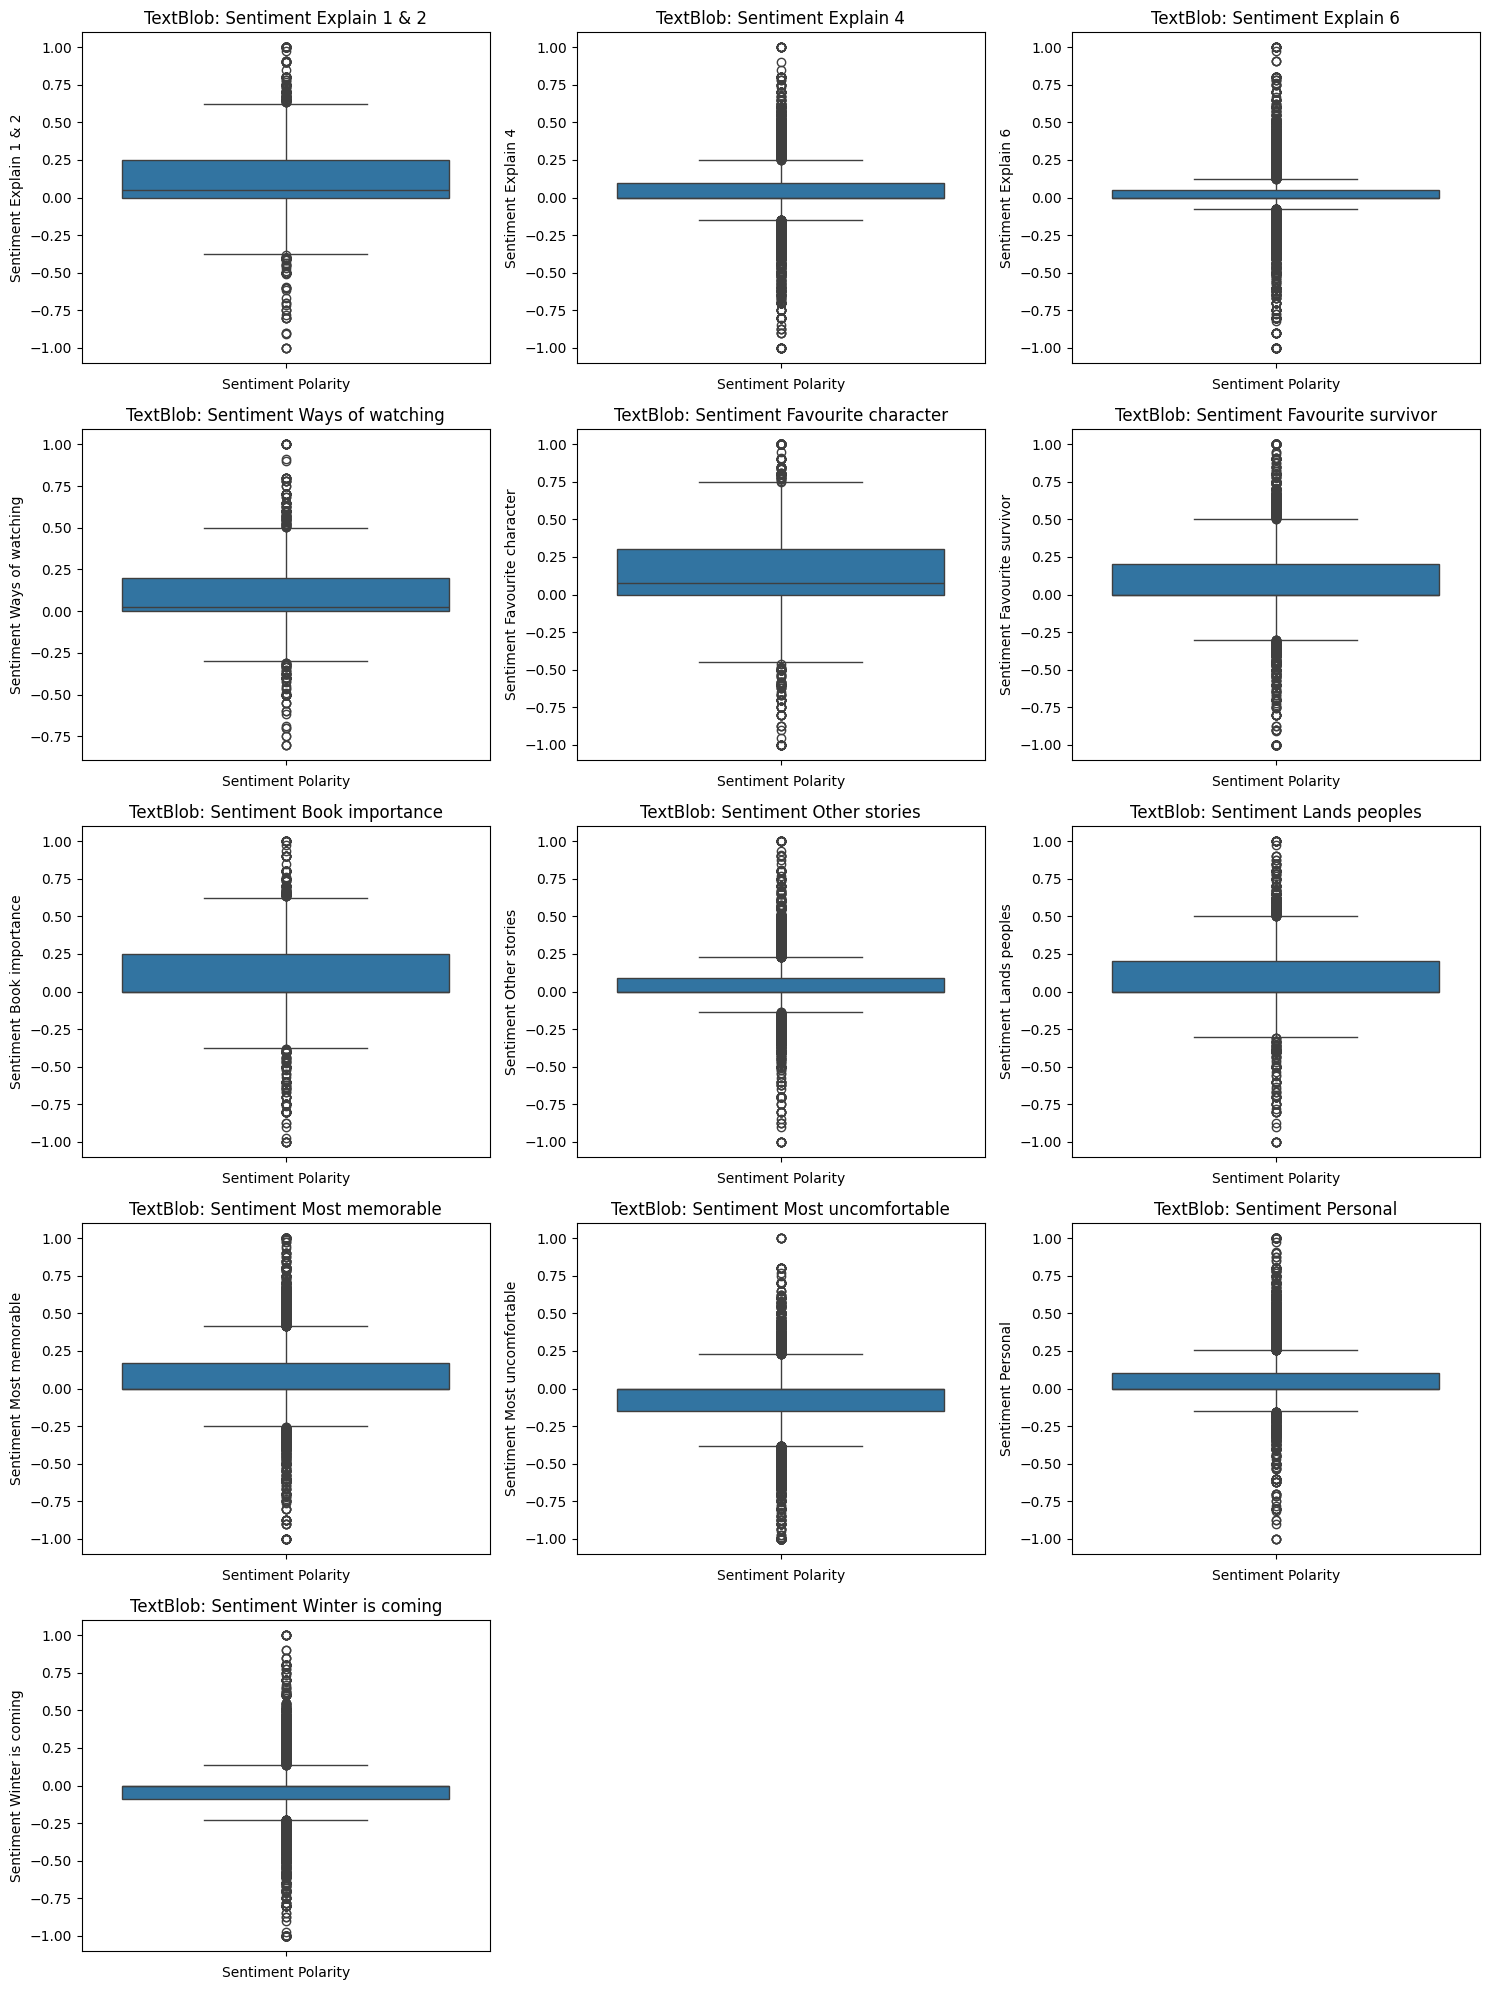

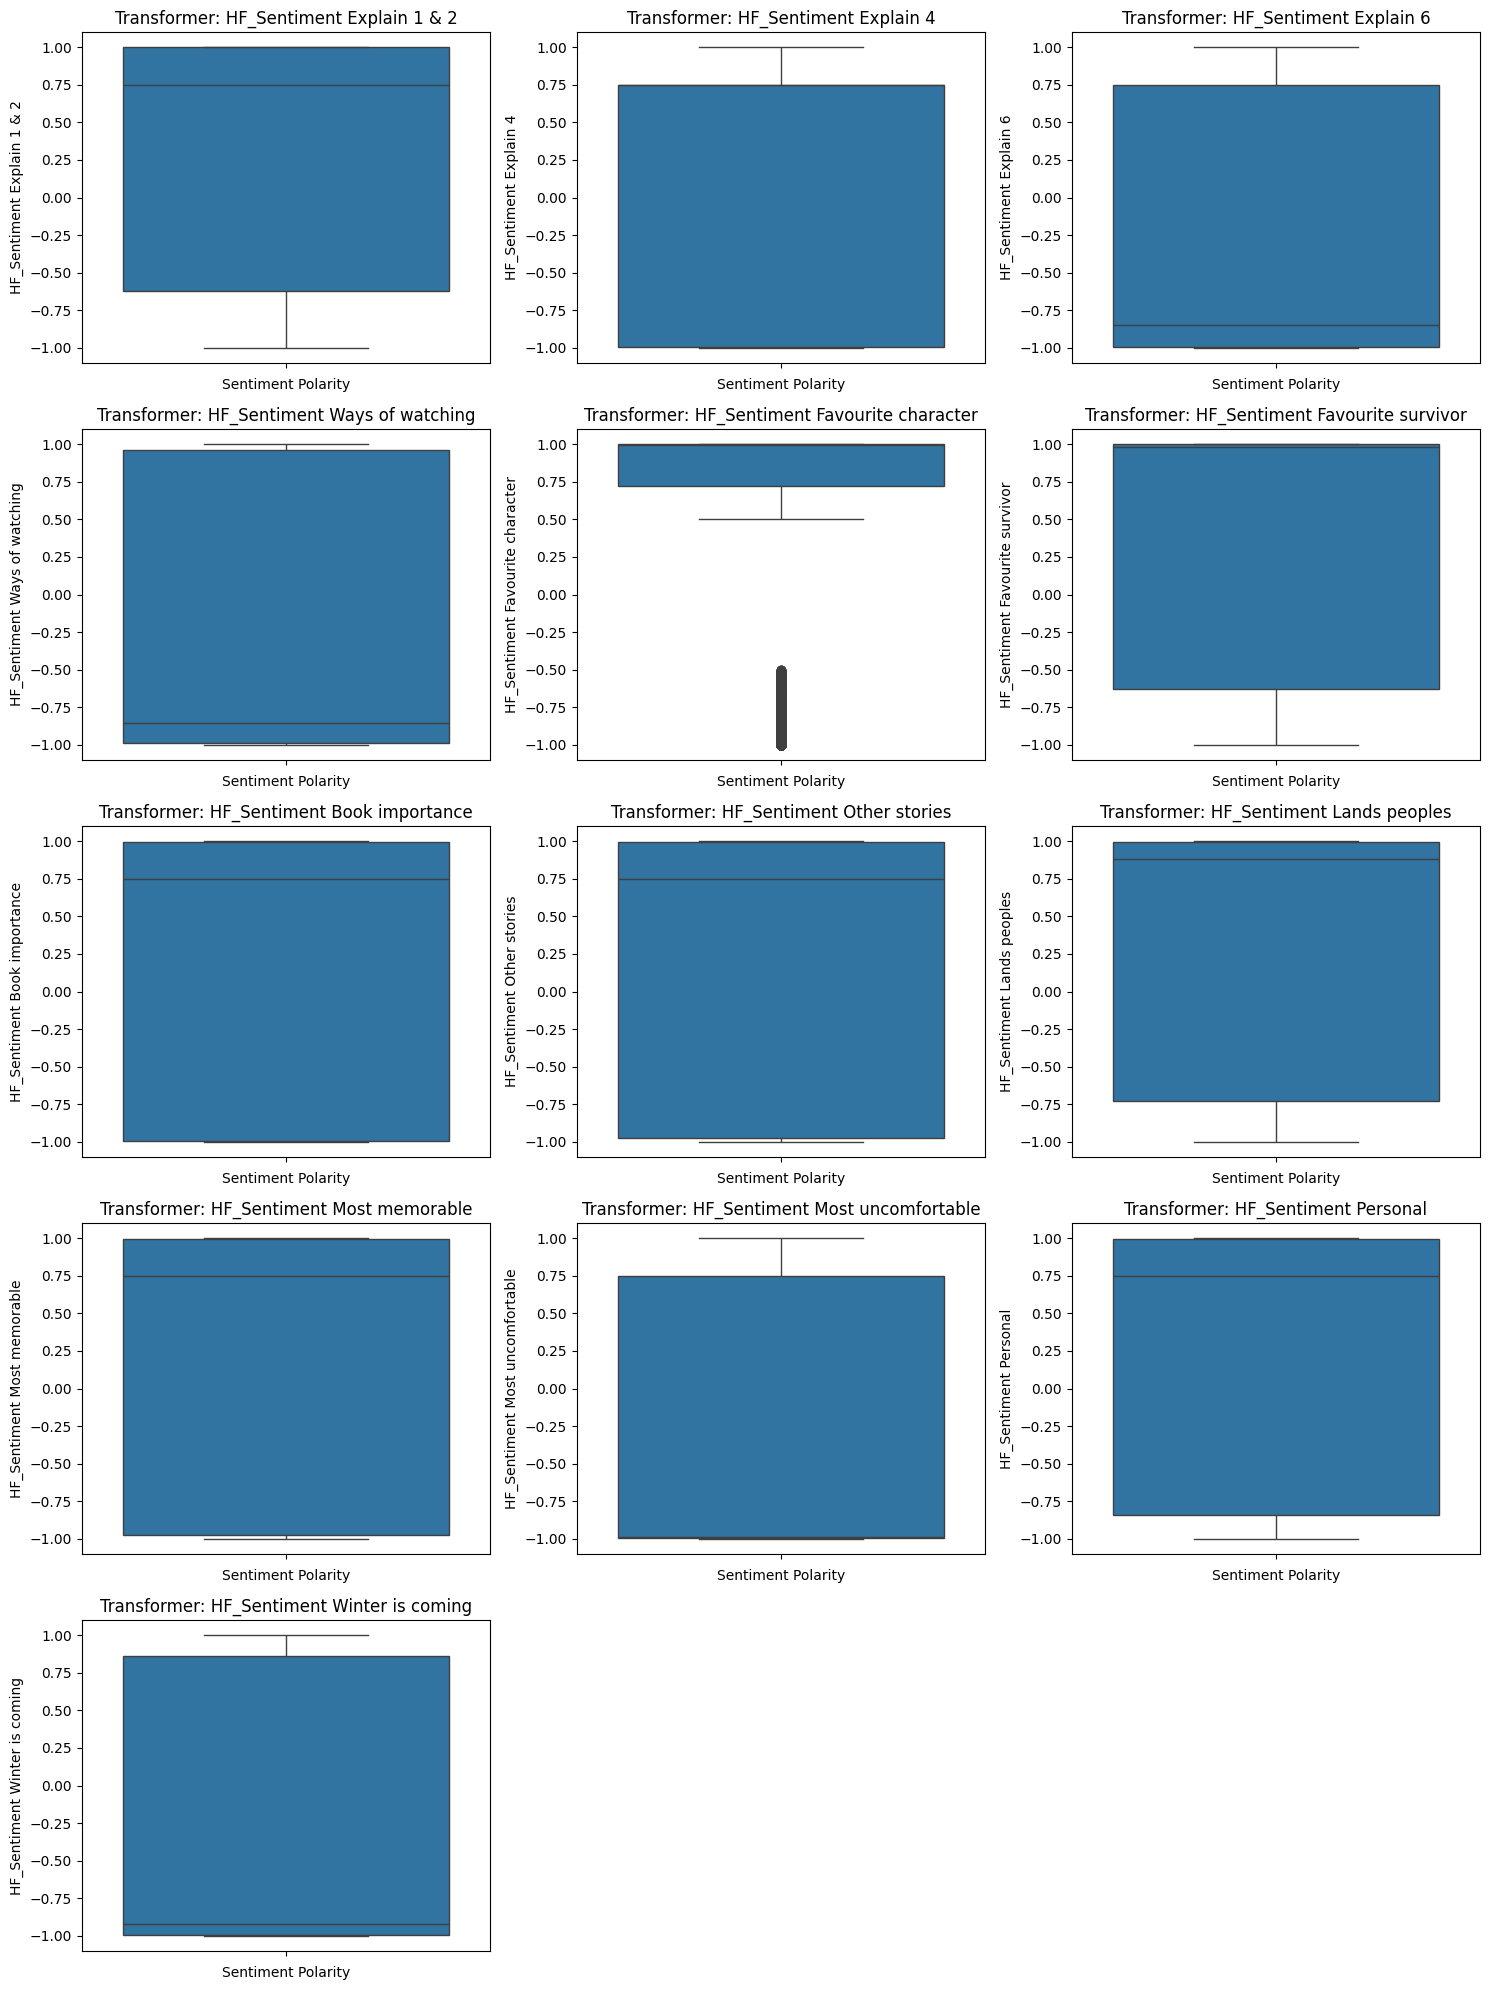

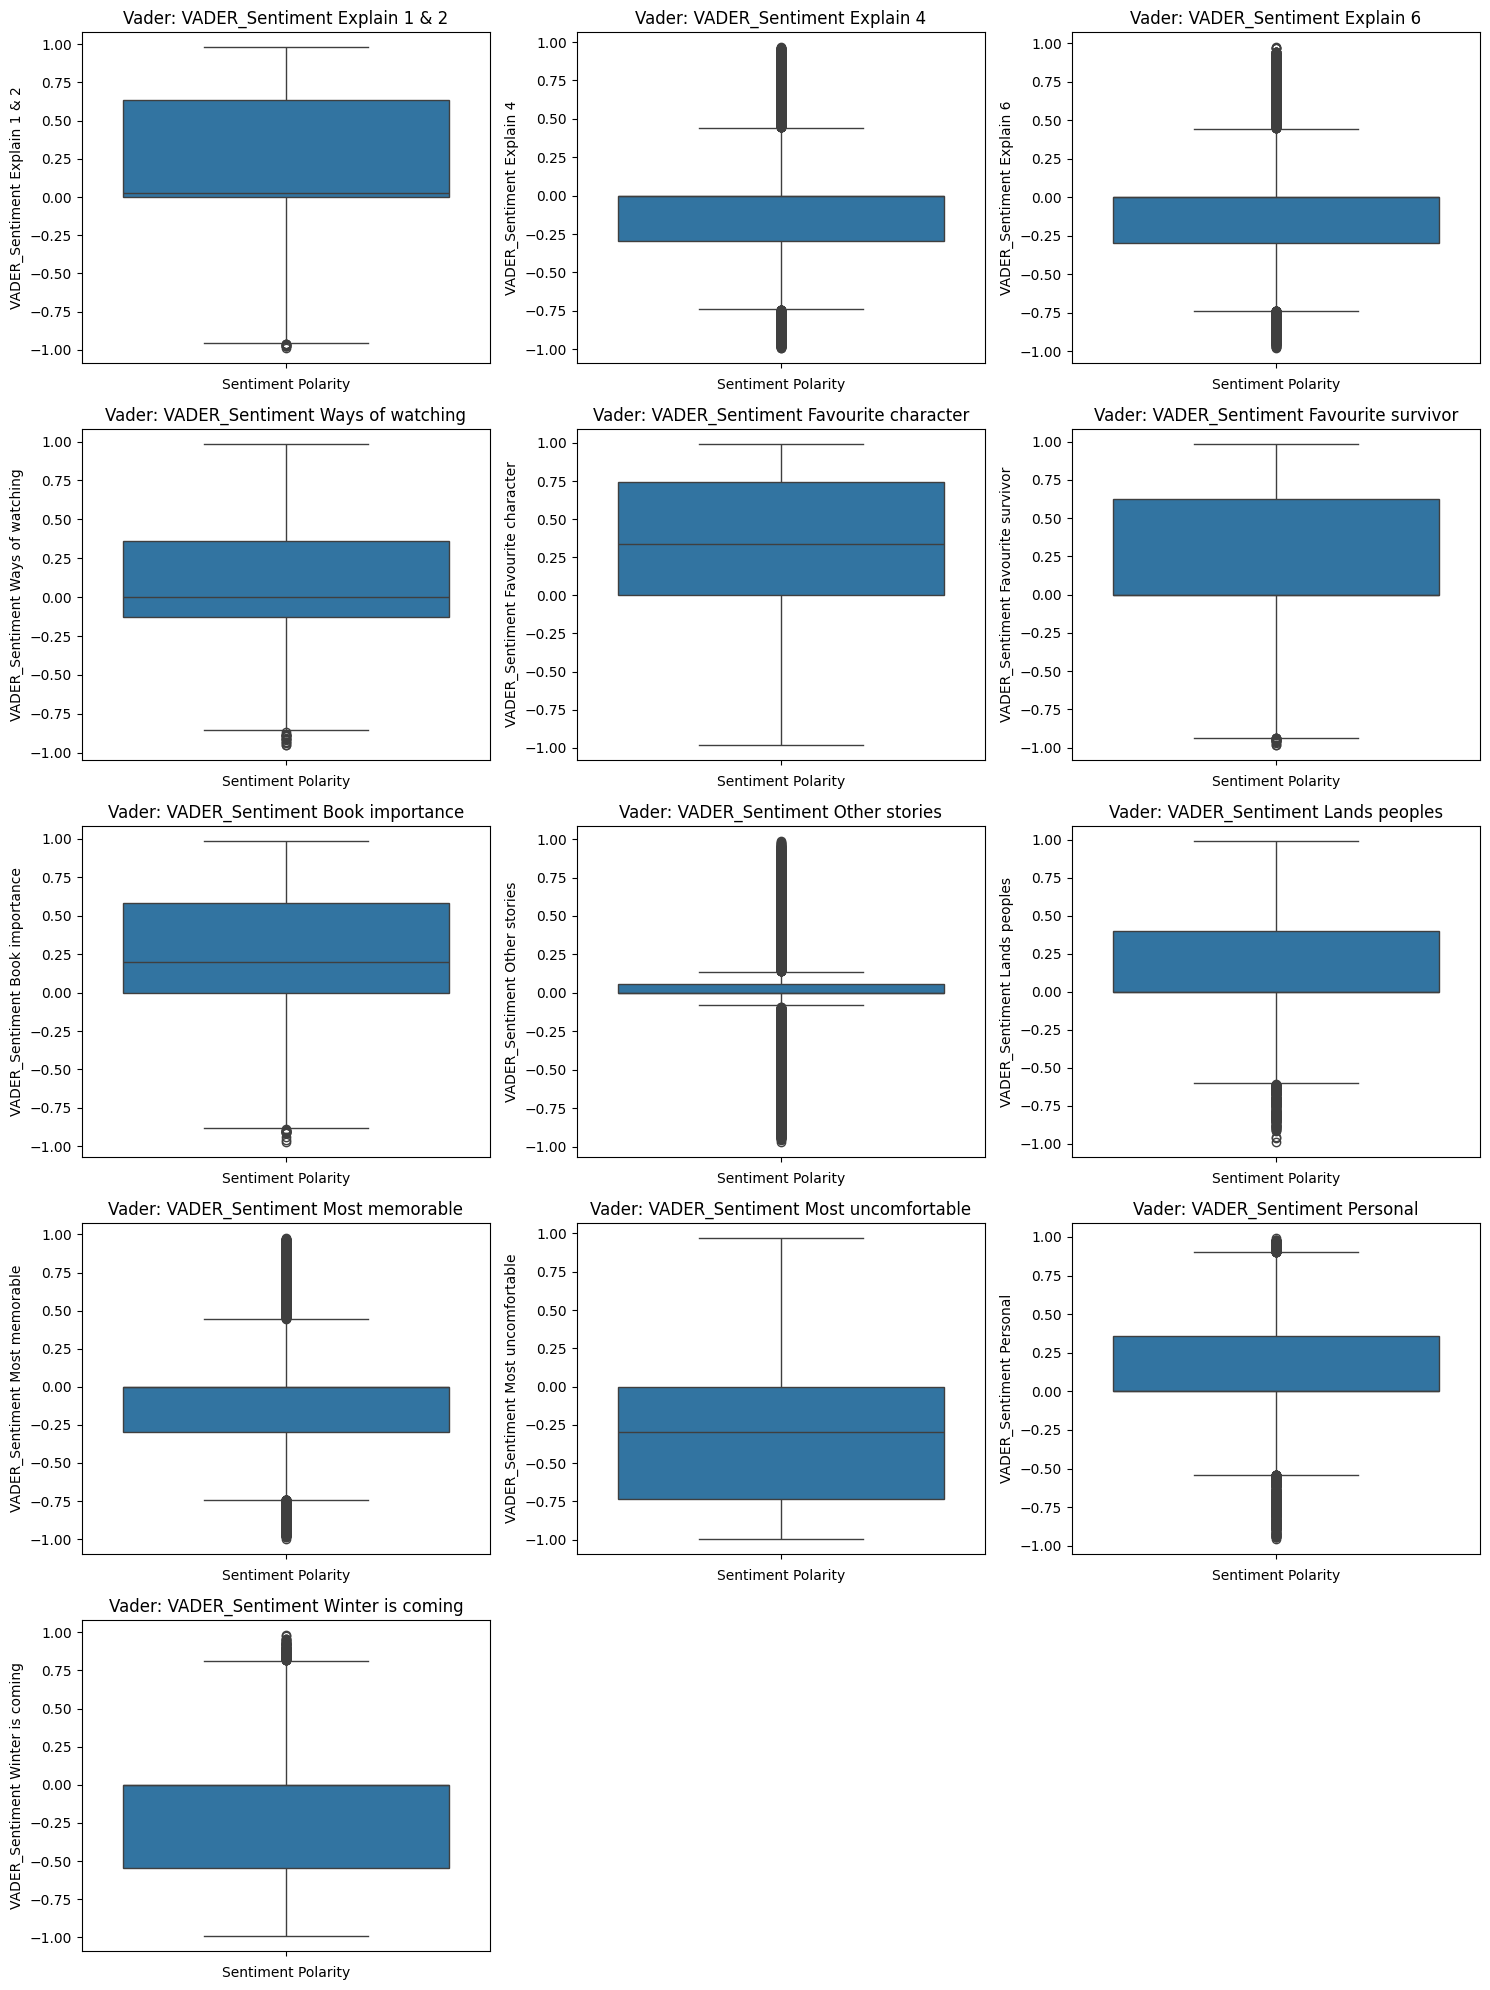

TextBlob Summary Statistics
       Sentiment Explain 1 & 2  Sentiment Explain 4  Sentiment Explain 6  \
count             10638.000000         10638.000000         10638.000000   
mean                  0.132167             0.040623             0.026679   
std                   0.209220             0.193585             0.189529   
min                  -1.000000            -1.000000            -1.000000   
25%                   0.000000             0.000000             0.000000   
50%                   0.050000             0.000000             0.000000   
75%                   0.250000             0.100000             0.050000   
max                   1.000000             1.000000             1.000000   

       Sentiment Ways of watching  Sentiment Favourite character  \
count                10638.000000                   10638.000000   
mean                     0.096612                       0.141042   
std                      0.174865                       0.252517   
min            

In [ ]:
# Calculate summary statistics for TextBlob sentiment scores
textblob_summary = data[sentiment_columns].describe()

# Calculate summary statistics for HuggingFace sentiment scores
hf_summary = data[hf_sentiment_columns].describe()

# Calculate summary statistics for HuggingFace sentiment scores
vader_summary = data[vader_sentiment_columns].describe()

textblob_summary, hf_summary, vader_summary

# Plot summary statistics for TextBlob sentiment scores
fig, axes = plt.subplots(nrows=(len(sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(sentiment_columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'TextBlob: {col}')
    axes[i].set_xlabel('Sentiment Polarity')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('textblob_sentiment_summary.png')
plt.show()

# Plot summary statistics for HuggingFace sentiment scores
fig, axes = plt.subplots(nrows=(len(hf_sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(hf_sentiment_columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Transformer: {col}')
    axes[i].set_xlabel('Sentiment Polarity')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('hf_sentiment_summary.png')
plt.show()

# Plot summary statistics for Vader sentiment scores
fig, axes = plt.subplots(nrows=(len(vader_sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(vader_sentiment_columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Vader: {col}')
    axes[i].set_xlabel('Sentiment Polarity')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('vader_sentiment_summary.png')
plt.show()

# Print summary statistics
print("TextBlob Summary Statistics")
print(textblob_summary)

print("\nTransformer Summary Statistics")
print(hf_summary)

print("\Vader Summary Statistics")
print(vader_summary)


The code below compares the sentiment analysis using both Textblob and Transformers. The plots for transformer based analysis and Vader is explained as follows:
* HF_Sentiment Explain 1 & 2: The majority of sentiment scores are clustered at the extreme positive end (1.0) and the extreme negative end (-1.0), with a smaller peak around the negative sentiment. Responses to "Explain 1 & 2" are highly polarized, with many strong positive and strong negative sentiments.
* HF_Sentiment Explain 4: Similar to "Explain 1 & 2", there are two peaks, one at the positive extreme and one at the negative extreme, with the negative peak being more pronounced. Responses to "Explain 4" are also polarized, with a slight bias towards negative sentiments.
* HF_Sentiment Explain 6: The distribution is similar to the previous columns, with strong peaks at both sentiment extremes and more emphasis on the negative end. Responses to "Explain 6" are highly polarized with a tendency towards negative sentiment.
* HF_Sentiment Ways of watching: This column shows a significant peak at the positive extreme, with a smaller peak at the negative extreme. Most viewers have a strongly positive sentiment about their "Ways of watching", but there is a notable number of strongly negative responses as well.
* HF_Sentiment Favourite character: The sentiment is predominantly positive, with a significant peak at the positive end and a smaller peak at the negative end. Viewers generally have positive sentiments about their favorite characters, though some negative sentiments exist.
* HF_Sentiment Favourite survivor: Similar to "Favourite character", but with an even more pronounced positive sentiment peak and a lesser negative peak. The sentiment towards favorite survivors is largely positive.
* HF_Sentiment Book importance: There are two significant peaks at both extremes, with the negative sentiment slightly more pronounced. Opinions on the importance of the book are divided, with a slight inclination towards negative sentiment.
* HF_Sentiment Other stories: The distribution shows two peaks at both sentiment extremes. Sentiment regarding other stories is polarized between strong positive and strong negative feelings.
* HF_Sentiment Lands peoples: Similar to other columns, there are two significant peaks, indicating polarized sentiment. Opinions about lands and peoples are strongly divided between positive and negative sentiments.
* HF_Sentiment Most memorable: The sentiment is predominantly positive, with the largest peak at the positive extreme. Most viewers have positive sentiments regarding the most memorable aspects, but there is a notable amount of negative sentiment as well.
* HF_Sentiment Most uncomfortable: There is a large peak at the positive extreme and a smaller peak at the negative extreme.Viewers' sentiments towards the most uncomfortable aspects are mixed but lean more towards positive.
* HF_Sentiment Personal: The distribution shows two significant peaks at both sentiment extremes. Personal opinions are polarized, with a similar number of strong positive and strong negative sentiments.
* HF_Sentiment Winter is coming: The sentiment is predominantly positive, with the largest peak at the positive extreme. Viewers generally have positive sentiments regarding "Winter is coming".

VADER Sentiment Analysis Interpretation:
* VADER_Sentiment Explain 1 & 2: The majority of sentiment scores are clustered around the neutral sentiment (0.0), with smaller peaks at both the positive and negative extremes. Responses to "Explain 1 & 2" are mostly neutral, with some strong positive and negative sentiments indicating mixed opinions.
* VADER_Sentiment Explain 4: Similar to "Explain 1 & 2", the distribution is centered around neutral sentiment, with notable peaks at the extreme positive and negative ends. Responses to "Explain 4" are generally neutral, but there are significant polarized sentiments both positively and negatively.
* VADER_Sentiment Explain 6: The distribution is centered around neutral with smaller peaks at the extremes. Responses to "Explain 6" are mostly neutral, but there are also strong positive and negative sentiments.
* VADER_Sentiment Ways of watching: The sentiment distribution shows a central peak around neutral with notable positive sentiment and a smaller negative peak. Most viewers have a neutral to slightly positive sentiment about their "Ways of watching," but there is also a presence of negative responses.
* VADER_Sentiment Favourite character: The sentiment is predominantly positive, with a significant peak at the positive end and a lesser peak at the neutral sentiment. Viewers generally have positive sentiments about their favorite characters, though neutral and some negative sentiments exist.
* VADER_Sentiment Favourite survivor: Similar to "Favourite character," but with a stronger positive sentiment peak and a smaller peak around neutrality. The sentiment towards favorite survivors is largely positive, with fewer neutral and negative responses.
* VADER_Sentiment Book importance: The distribution shows a significant positive peak, with smaller peaks at neutral and negative ends. Opinions on the importance of the book are divided, but there is a slight inclination towards positive sentiment.
* VADER_Sentiment Other stories: The sentiment is predominantly neutral, with smaller peaks at the positive and negative extremes. Sentiment regarding other stories is mostly neutral, with mixed feelings showing some strong positive and negative responses.
* VADER_Sentiment Lands peoples: The distribution shows a central peak around neutral sentiment, with notable positive sentiment and some negative sentiment. Opinions about lands and peoples are generally neutral with positive tendencies, though there are also negative sentiments.
* VADER_Sentiment Most memorable: The sentiment is centered around neutral with significant peaks at both extremes. Most viewers have neutral sentiments regarding the most memorable aspects, but there is a notable amount of positive and negative sentiment as well.
* VADER_Sentiment Most uncomfortable: The distribution shows a neutral central peak, with significant negative sentiment and a smaller positive peak. Viewers' sentiments towards the most uncomfortable aspects are mixed, but lean more towards negative sentiments.
* VADER_Sentiment Personal: The distribution shows a central peak at neutral sentiment, with significant peaks at both the positive and negative extremes. Personal opinions are mostly neutral, but there are strong positive and negative sentiments indicating polarized opinions.
* VADER_Sentiment Winter is coming: The sentiment is centered around neutral with notable negative and positive peaks. Viewers generally have neutral to slightly negative sentiments regarding "Winter is coming," with some strong positive and negative opinions.



General Interpretation of Transformer based analysis:

* Polarization: Many of the sentiment distributions show a high degree of polarization, with significant peaks at both positive and negative extremes. This suggests that viewers' opinions on various aspects are strongly divided.
* Positive Bias: In many subplots, there is a pronounced peak at the positive sentiment extreme, indicating that a large portion of responses are very positive.
* Negative Sentiment: There are also significant peaks at the negative sentiment extreme, highlighting that some aspects generate strong negative reactions.

General Interpretation of VADER based analysis:

The interpretations of the VADER sentiment analysis results reveal a mix of neutral, positive, and negative sentiments across various aspects of "Game of Thrones." The presence of neutral central tendencies with significant peaks at the extremes highlights the mixed and polarized opinions of the viewers.

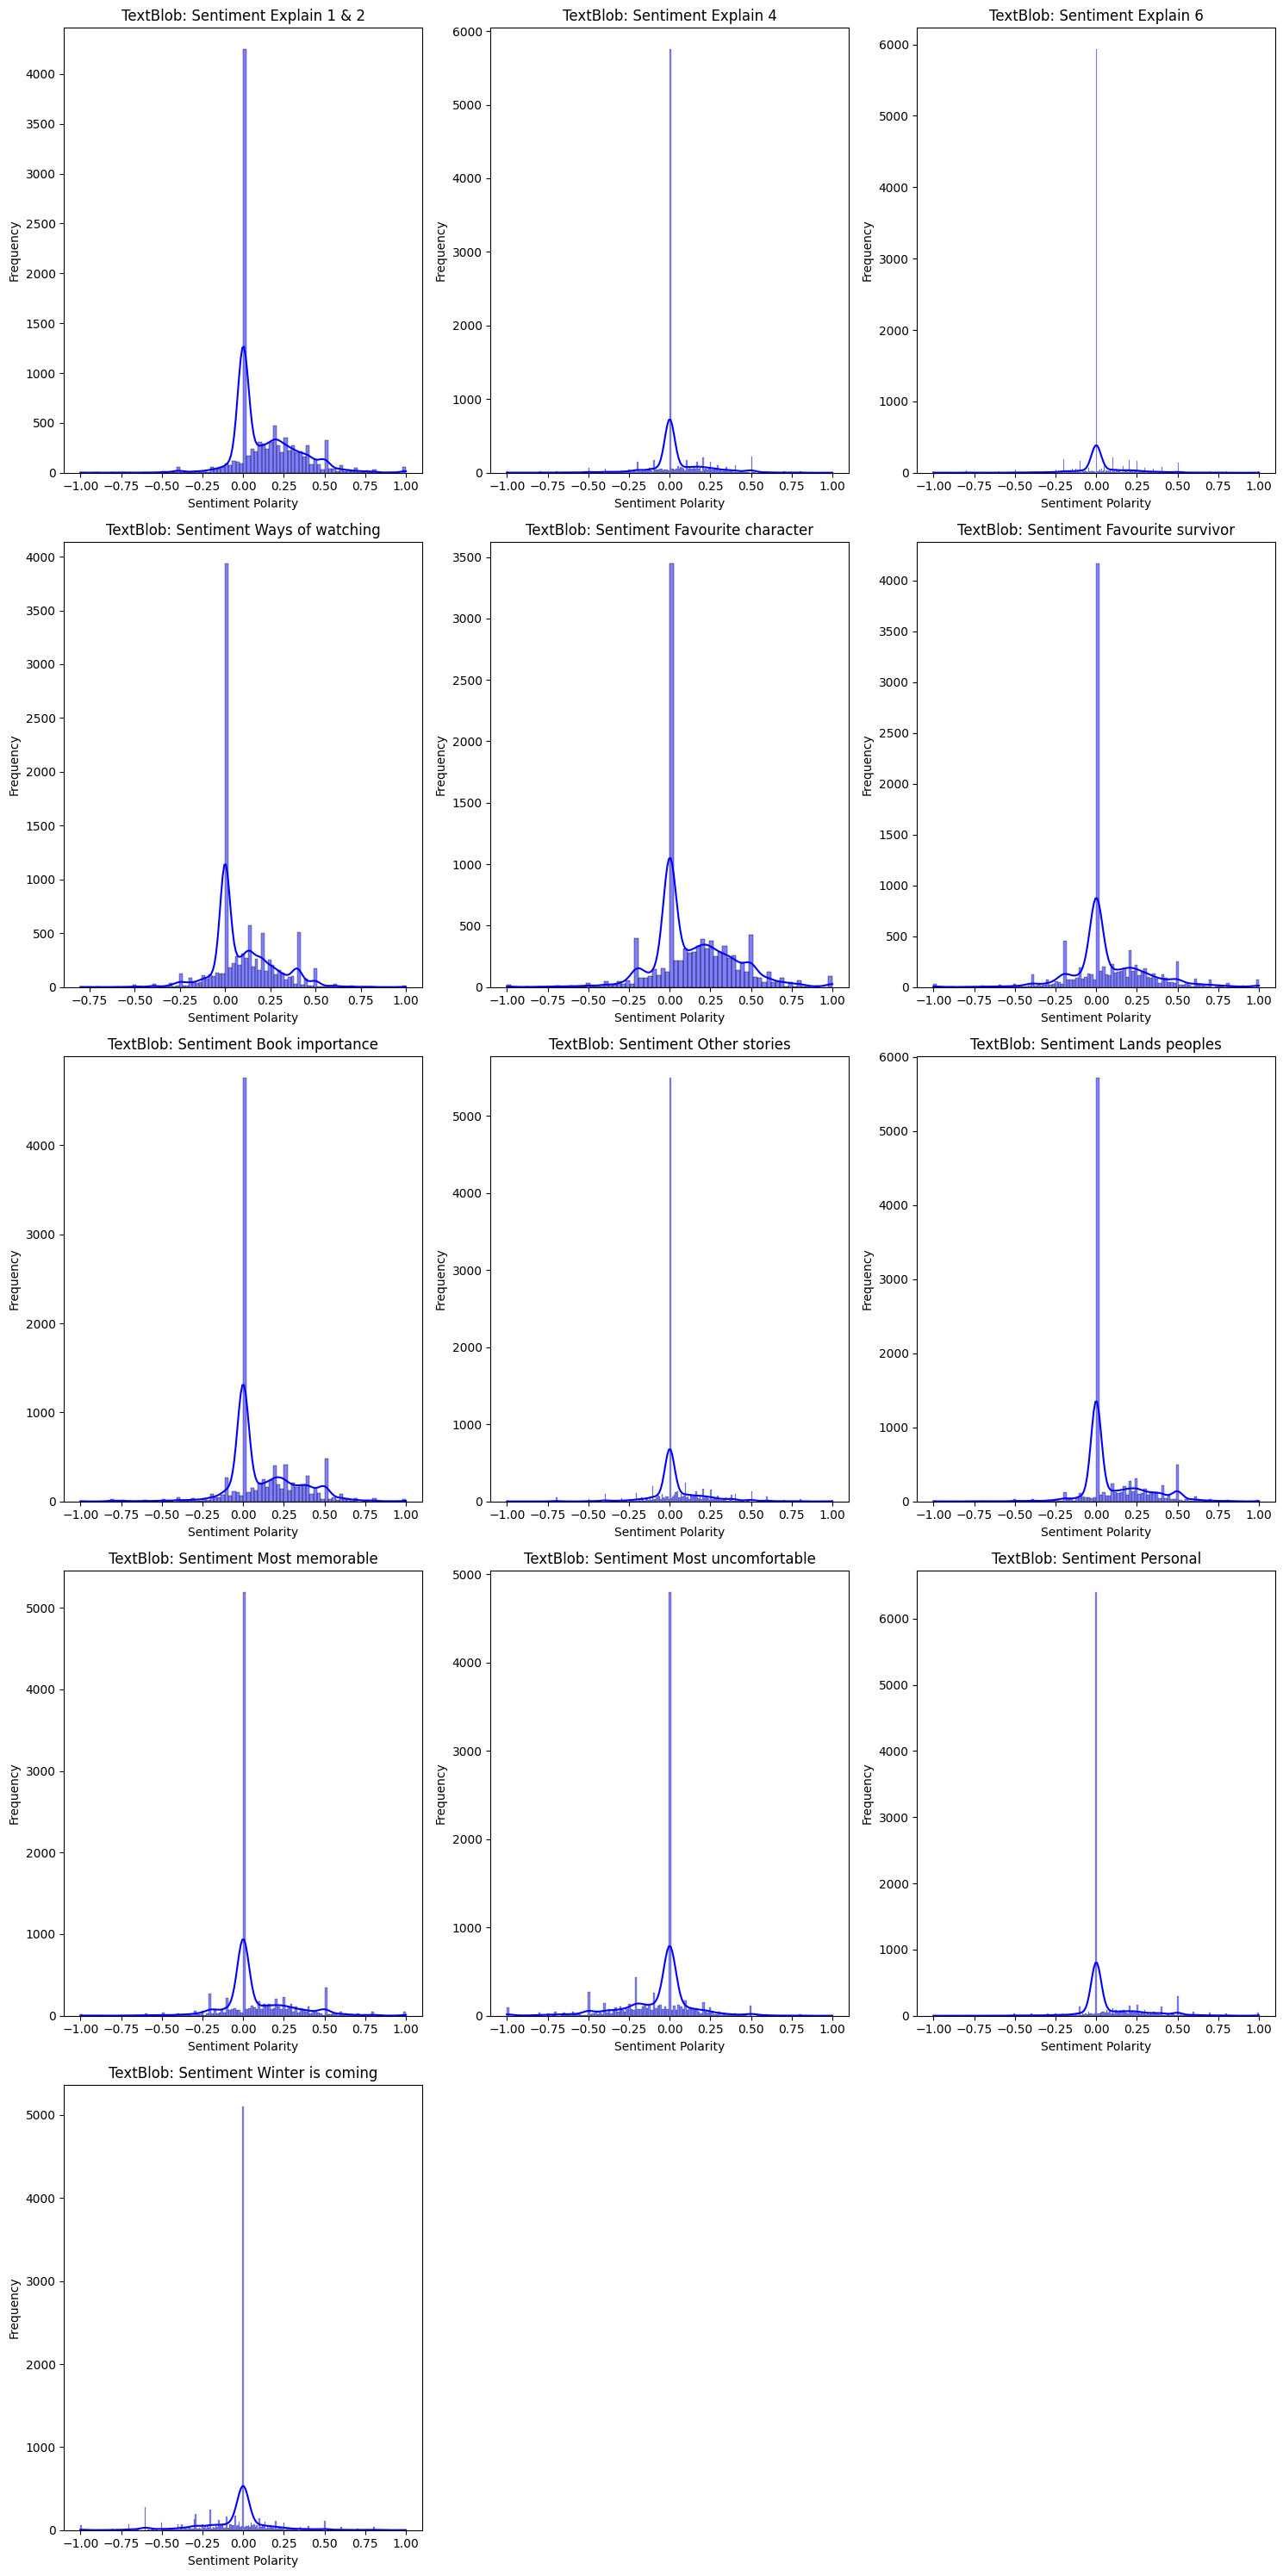

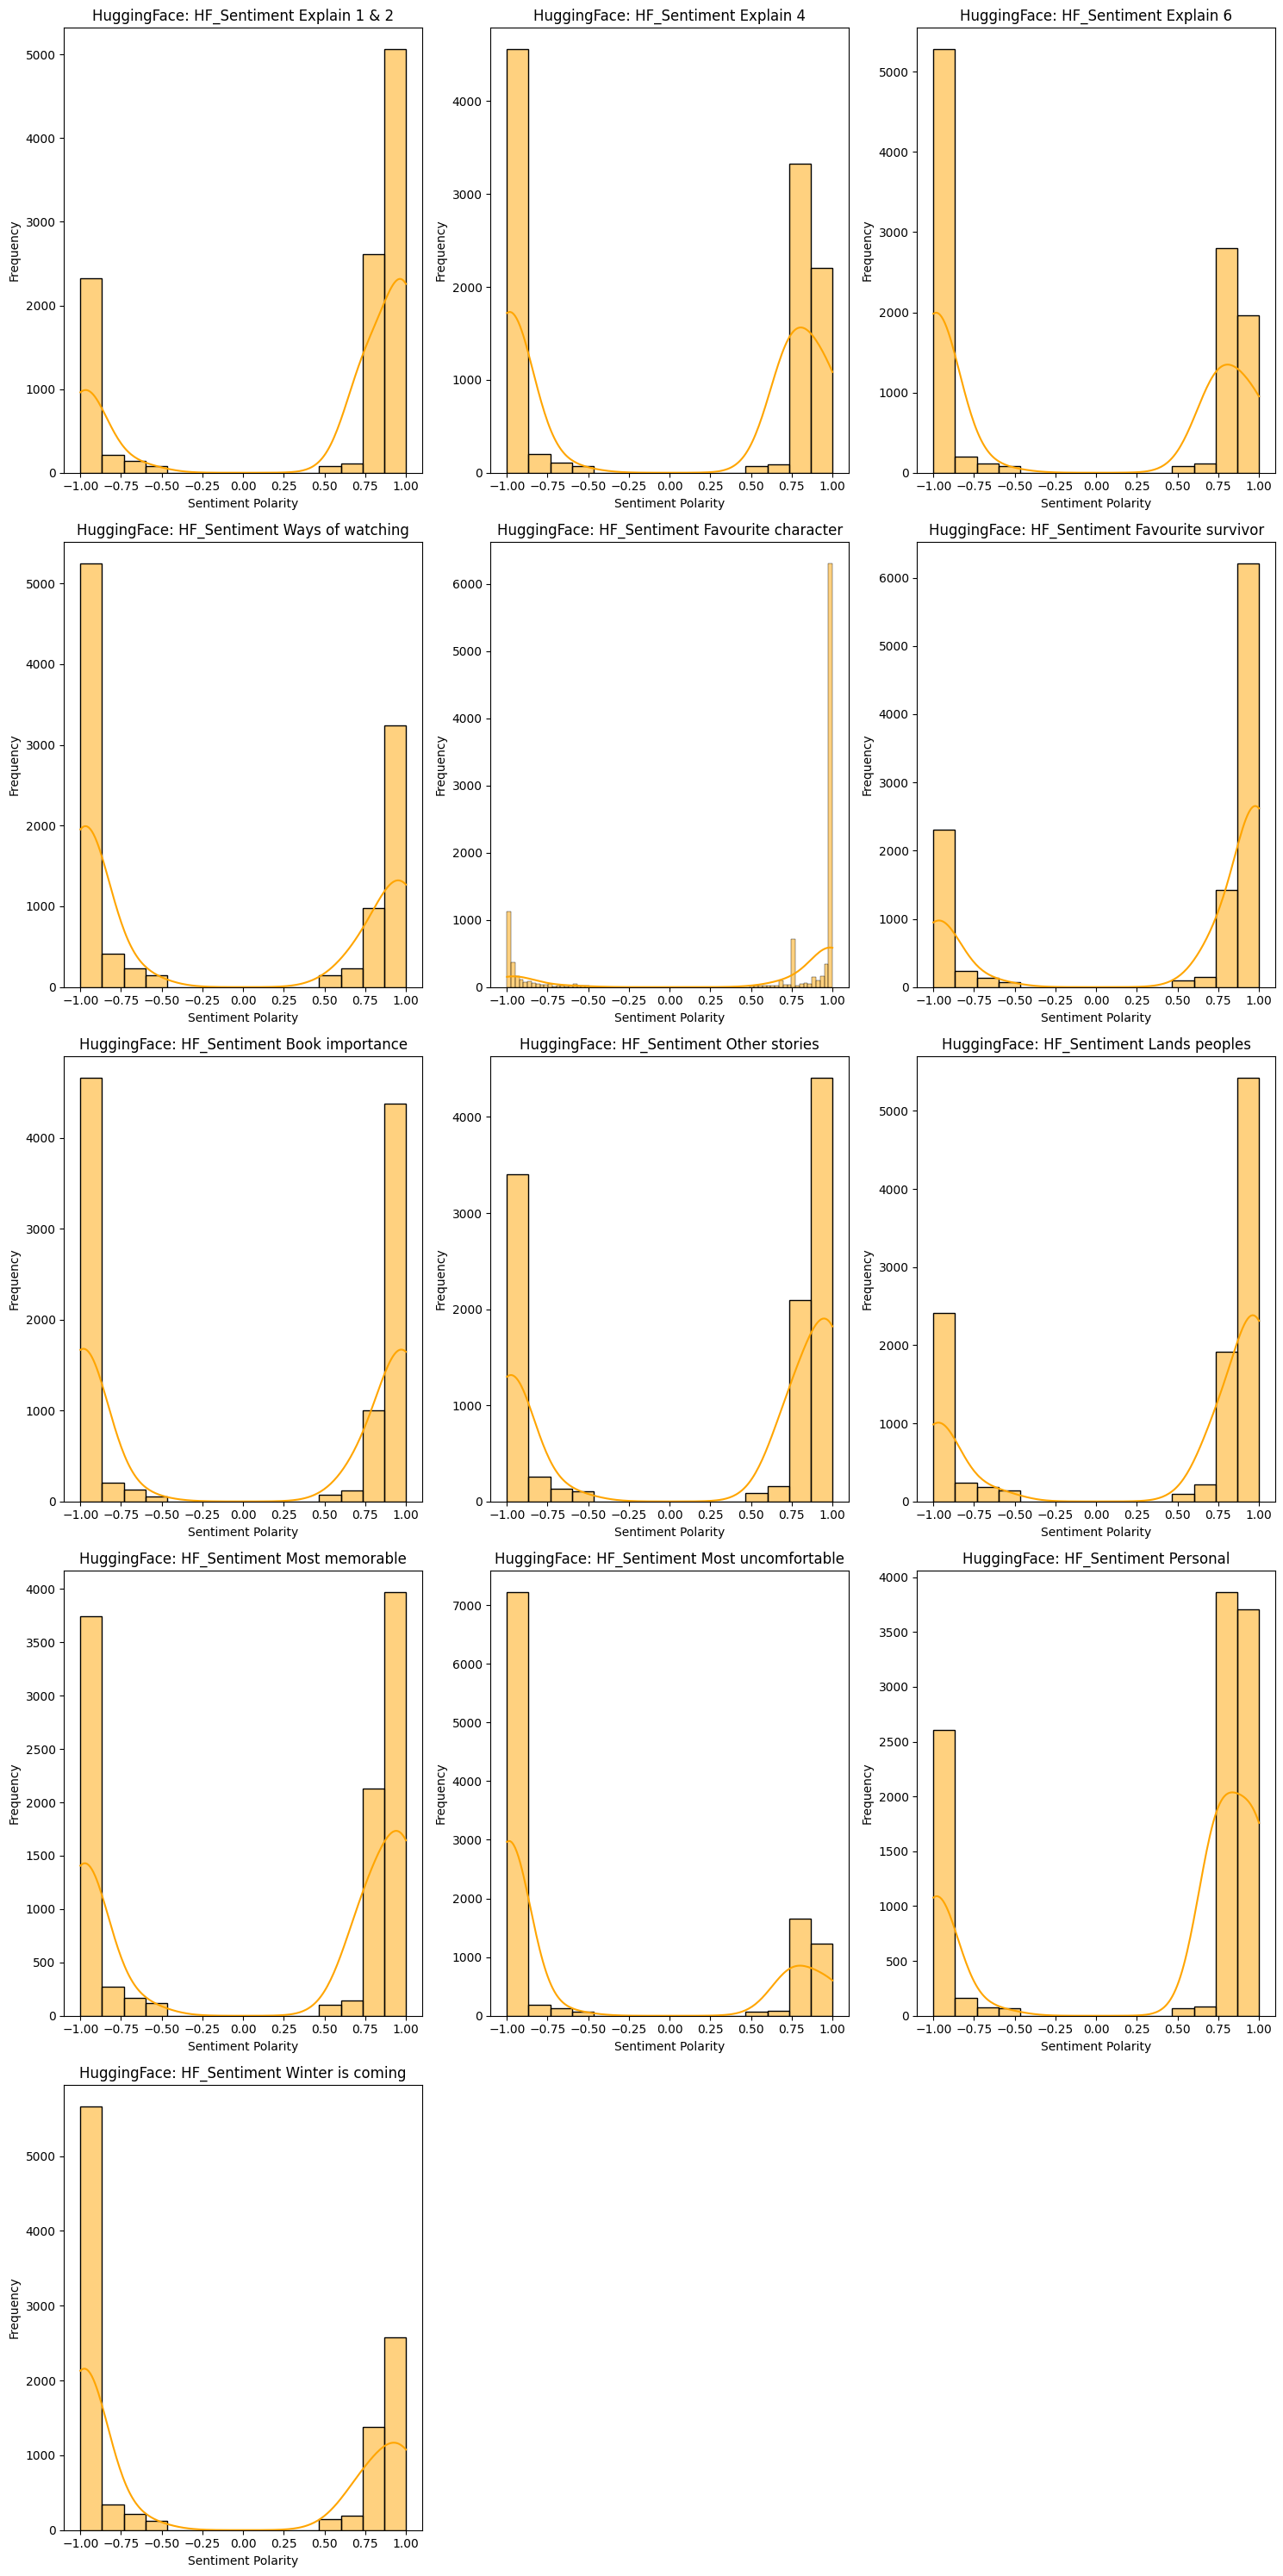

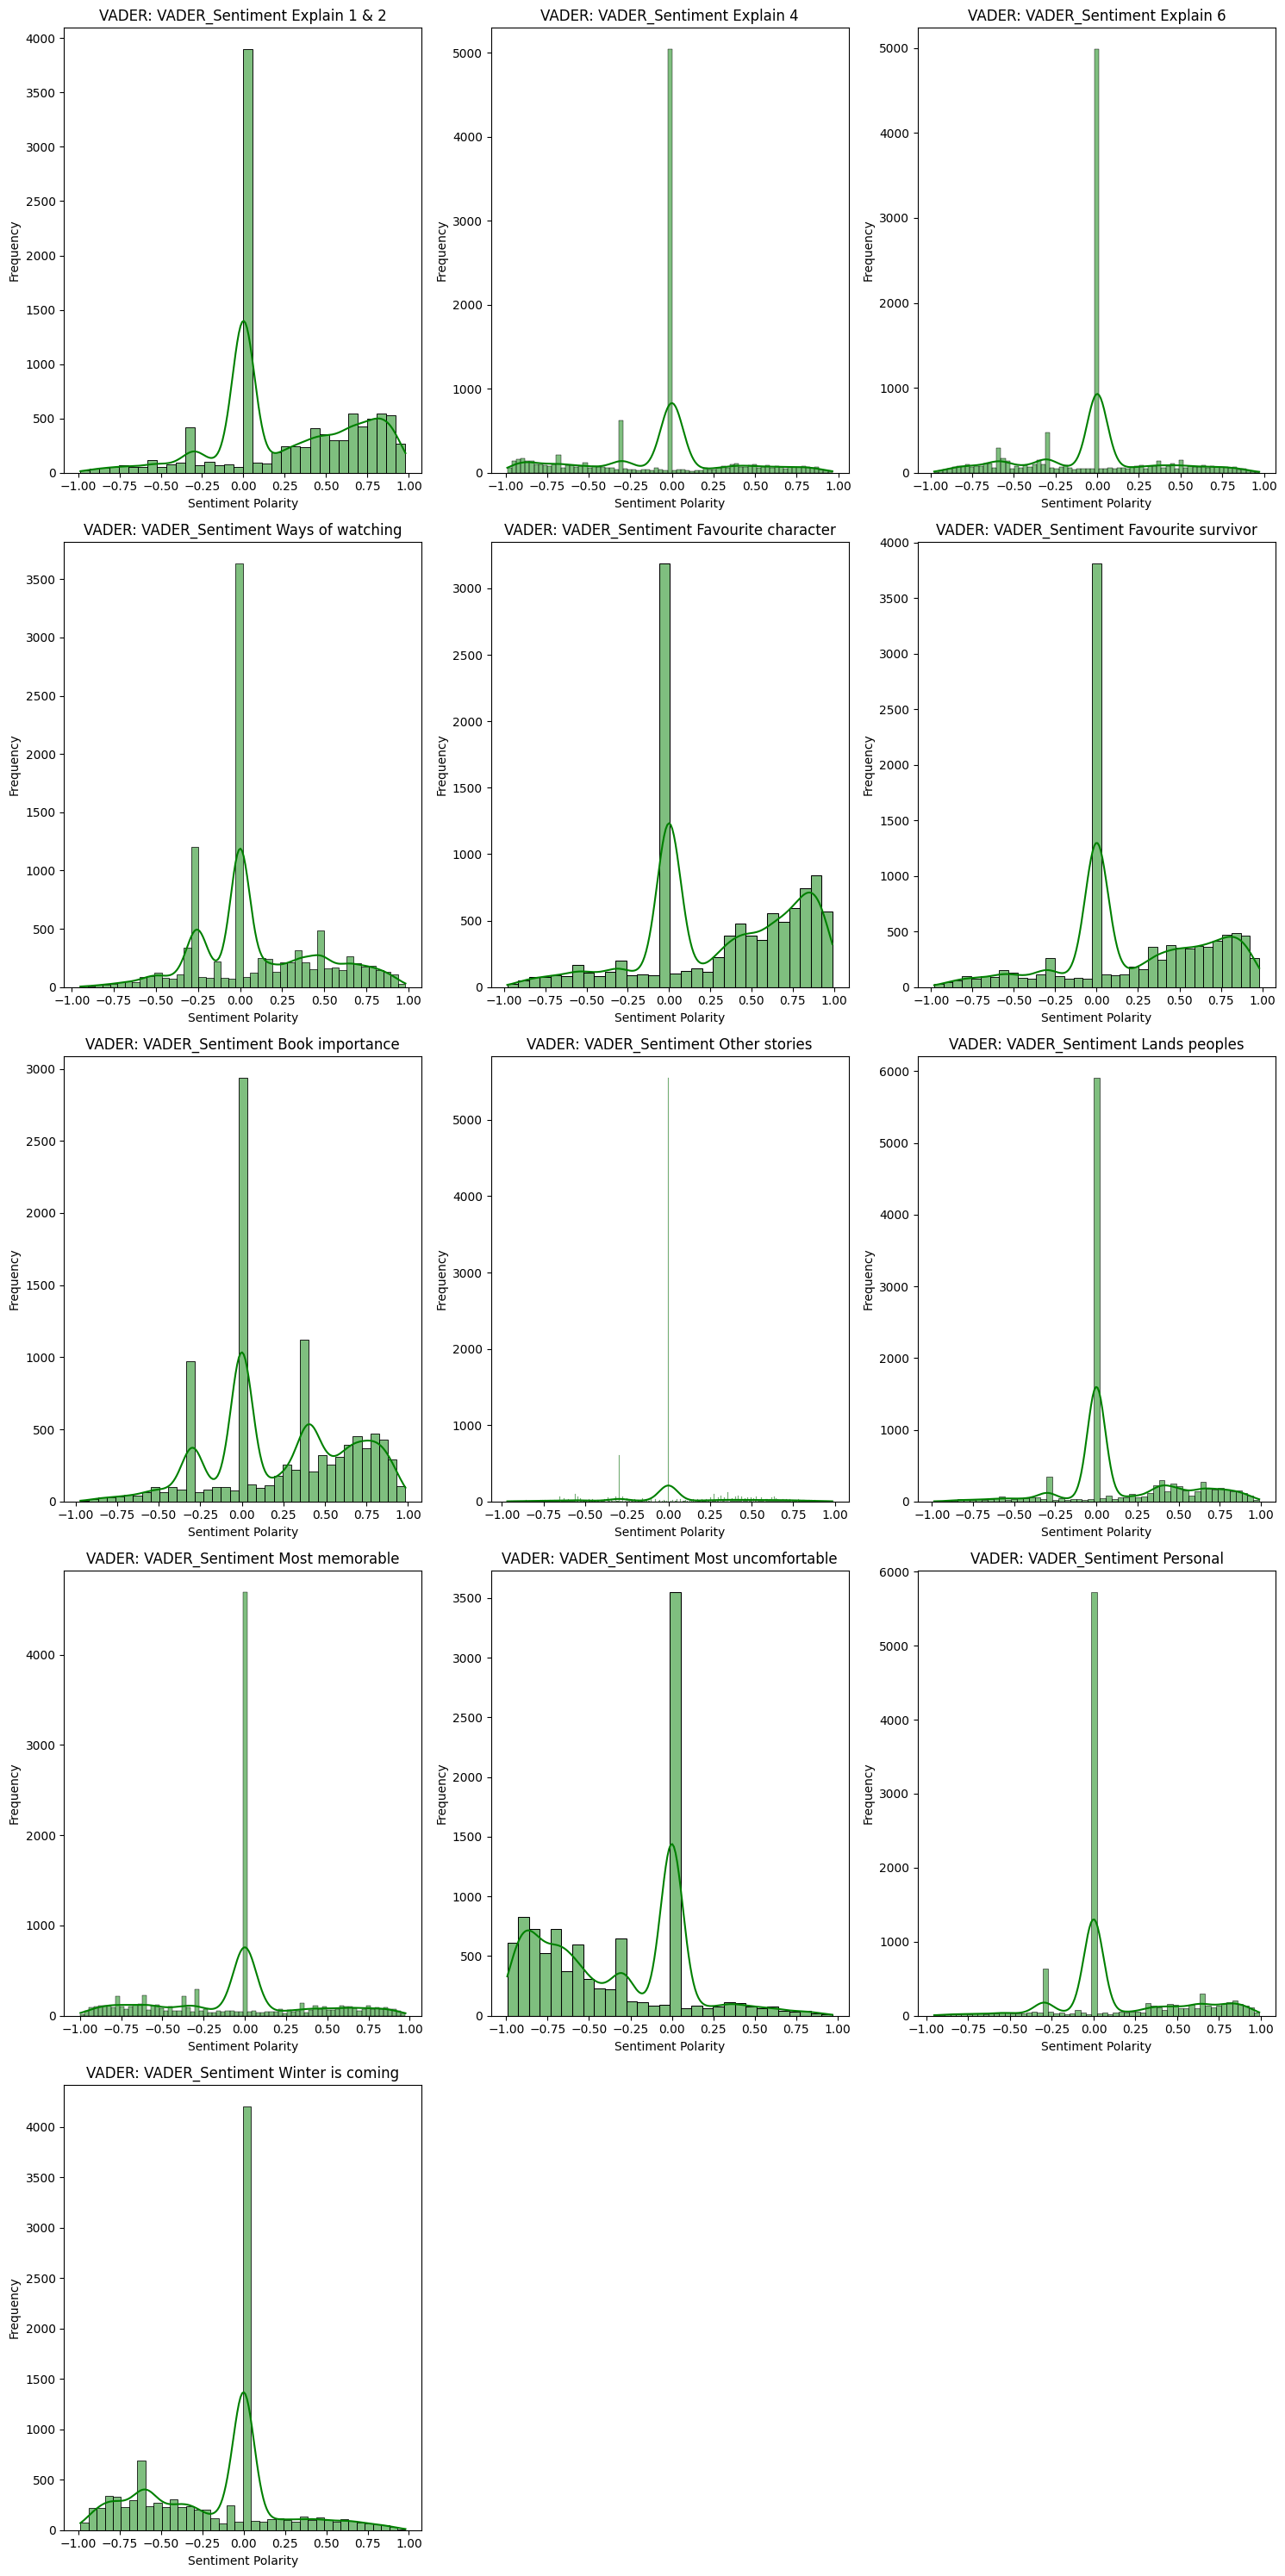

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data into a DataFrame (example)
# data = pd.read_excel('/path/to/your/fullset.xlsx')

# List of TextBlob sentiment columns
sentiment_columns = [
    'Sentiment Explain 1 & 2', 'Sentiment Explain 4', 'Sentiment Explain 6',
    'Sentiment Ways of watching', 'Sentiment Favourite character', 'Sentiment Favourite survivor',
    'Sentiment Book importance', 'Sentiment Other stories', 'Sentiment Lands peoples',
    'Sentiment Most memorable', 'Sentiment Most uncomfortable', 'Sentiment Personal',
    'Sentiment Winter is coming'
]

# List of HuggingFace sentiment columns
hf_sentiment_columns = [
    'HF_Sentiment Explain 1 & 2',
    'HF_Sentiment Explain 4',
    'HF_Sentiment Explain 6',
    'HF_Sentiment Ways of watching',
    'HF_Sentiment Favourite character',
    'HF_Sentiment Favourite survivor',
    'HF_Sentiment Book importance',
    'HF_Sentiment Other stories',
    'HF_Sentiment Lands peoples',
    'HF_Sentiment Most memorable',
    'HF_Sentiment Most uncomfortable',
    'HF_Sentiment Personal',
    'HF_Sentiment Winter is coming'
]

# List of VADER sentiment columns
vader_sentiment_columns = [
    'VADER_Sentiment Explain 1 & 2',
    'VADER_Sentiment Explain 4',
    'VADER_Sentiment Explain 6',
    'VADER_Sentiment Ways of watching',
    'VADER_Sentiment Favourite character',
    'VADER_Sentiment Favourite survivor',
    'VADER_Sentiment Book importance',
    'VADER_Sentiment Other stories',
    'VADER_Sentiment Lands peoples',
    'VADER_Sentiment Most memorable',
    'VADER_Sentiment Most uncomfortable',
    'VADER_Sentiment Personal',
    'VADER_Sentiment Winter is coming'
]

# Function to calculate VADER sentiment scores
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_vader_sentiment(text):
    if pd.isnull(text):
        return None
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Calculate VADER sentiment scores for the specified columns
for col in [
    'Explain 1 & 2', 'Explain 4', 'Explain 6',
    'Ways of watching', 'Favourite character', 'Favourite survivor',
    'Book importance', 'Other stories', 'Lands peoples',
    'Most memorable', 'Most uncomfortable', 'Personal',
    'Winter is coming'
]:
    data['VADER_Sentiment ' + col] = data[col].apply(calculate_vader_sentiment)

# Creating the plots for TextBlob sentiment columns
fig, axes = plt.subplots(nrows=(len(sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, sentiment_column in enumerate(sentiment_columns):
    sns.histplot(data[sentiment_column], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'TextBlob: {sentiment_column}')
    axes[i].set_xlabel('Sentiment Polarity')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Creating the plots for HuggingFace sentiment columns
fig, axes = plt.subplots(nrows=(len(hf_sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, hf_sentiment_column in enumerate(hf_sentiment_columns):
    sns.histplot(data[hf_sentiment_column], kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'HuggingFace: {hf_sentiment_column}')
    axes[i].set_xlabel('Sentiment Polarity')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Creating the plots for VADER sentiment columns
fig, axes = plt.subplots(nrows=(len(vader_sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, vader_sentiment_column in enumerate(vader_sentiment_columns):
    sns.histplot(data[vader_sentiment_column], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'VADER: {vader_sentiment_column}')
    axes[i].set_xlabel('Sentiment Polarity')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('vader_sentiment_summary.png')
plt.show()


**Comparison Between TextBlob, HuggingFace, and VADER Sentiment Analyses**

* TextBlob: Most sentiment distributions are centered around neutral (0.0) with a slight positive skew. The distributions are narrow, indicating less variation and polarization in sentiment scores. There are fewer extreme negative or positive values compared to Transformer and VADER.

* Transformer: Sentiment distributions are highly polarized with significant peaks at both extremes (-1 and 1). There is more variation and spread in the sentiment scores, showing a wide range of opinions. Some columns show a predominant positive or negative sentiment, unlike the generally neutral sentiments seen with TextBlob.

* VADER:Sentiment distributions are centered around neutral with notable peaks at both positive and negative extremes. VADER captures a mix of neutral, positive, and negative sentiments, showing a balance between strong opinions and neutrality.


**Specific Observations:**

1. **Polarization:**

* TextBlob: Shows sentiments mostly around neutral with slight positive bias.
* HuggingFace: Exhibits strong polarization in sentiments for most
columns, with peaks at both positive and negative extremes.
* VADER: Captures a mix of neutral, positive, and negative sentiments, showing balanced but occasionally polarized opinions.

2. **Variability**:
* TextBlob: Sentiment scores have less variability and more concentrated distributions.
* HuggingFace: Sentiment scores show greater variability and more extreme values, indicating a wider range of opinions.
* VADER: Shows moderate variability with sentiments centered around neutral but also capturing strong positive and negative sentiments.

3. **Sentiment Skew**:
* TextBlob: Sentiment scores generally skew towards positive.
* HuggingFace: Scores exhibit strong peaks at both positive and negative extremes, indicating polarized opinions.
V* ADER: Sentiment scores are balanced with a central neutral tendency and peaks at both extremes, capturing a broad range of sentiments.


TextBlob tends to produce sentiment scores that are more conservative, clustering around neutral and slightly positive values. HuggingFace provides more polarized and varied sentiment scores, capturing a broader range of strong positive and negative sentiments. VADER offers a balanced view, capturing both neutral and strong opinions effectively. This comparison highlights the different strengths of each sentiment analysis tool in providing insights into viewer sentiments about "Game of Thrones."

# **Keyword Extraction**

* **Objective**: Discover keywords in a collection of texts.

The folllowing approaches are used for keyword extraction: TF-IDF, YAKE and KeyBERT

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
!pip install yake bertopic keybert -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.3 MB/s eta 0:00:00


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import yake
from keybert import KeyBERT

# Initialize KeyBERT model
kw_model = KeyBERT()


# Define the columns to analyze
columns_to_analyze = ['Ways of watching', 'Favourite character', 'Favourite survivor', 'Most memorable']

# Preprocess and fill NaN values
for column in columns_to_analyze:
    data[column] = data[column].fillna('').apply(lambda x: x.lower())

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Extract keywords for each column
for column in columns_to_analyze:
    print(f"\nKeywords for '{column}':")
    tfidf_matrix = tfidf_vectorizer.fit_transform(data[column])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    dense = tfidf_matrix.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)
    top_keywords = df.sum().sort_values(ascending=False).head(10)
    print(top_keywords)


# YAKE Keyword extraction
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

for column in columns_to_analyze:
    print(f"\nYake Keywords for '{column}':")
    text = ' '.join(data[column].tolist())
    keywords = custom_kw_extractor.extract_keywords(text)
    for kw in keywords:
        print(kw)


# Function to extract keywords from a column
def extract_keywords(text, model, top_n=10):
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 3), stop_words='english', top_n=top_n)
    return keywords

# Apply KeyBERT for each column
for column in columns_to_analyze:
    print(f"\nKeyBERT Keywords for '{column}':")
    text = ' '.join(data[column].dropna().tolist())
    keywords = extract_keywords(text, kw_model)
    print(keywords)





Keywords for 'Ways of watching':
watch        1972.589186
episodes     1227.106385
time         1221.729377
rewatch      1090.817789
episode      1081.741376
available     877.681338
live          821.181973
like          807.072204
soon          719.165485
streamed      702.662558
dtype: float64

Keywords for 'Favourite character':
tyrion        1540.250160
character     1203.879656
jon           1034.022308
arya          1004.426680
snow           834.670761
like           790.326081
stark          755.910378
lannister      729.481016
love           566.995421
characters     501.668693
dtype: float64

Keywords for 'Favourite survivor':
tyrion          1076.574044
game             977.930026
varys            858.344302
littlefinger     750.160015
lannister        587.344072
like             549.804616
cersei           536.019003
stark            519.264355
character        501.350047
jon              425.878871
dtype: float64

Keywords for 'Most memorable':
wedding    722.458612
red 

# **Column Similarity**

In the subsequent section, we analyse the similarity between columns using two different approaches: a TF-IDF based similarity approach and using sentence transformer (SBERT). We plot the heatmap of the similarity scores and compare both approaches.

                     Favourite character  Favourite survivor  Most memorable  \
Favourite character             1.000000            0.752171        0.568074   
Favourite survivor              0.752171            1.000000        0.498740   
Most memorable                  0.568074            0.498740        1.000000   
Most uncomfortable              0.446391            0.427142        0.687543   
Other stories                   0.284922            0.347556        0.302690   
Personal                        0.445015            0.461576        0.433910   

                     Most uncomfortable  Other stories  Personal  
Favourite character            0.446391       0.284922  0.445015  
Favourite survivor             0.427142       0.347556  0.461576  
Most memorable                 0.687543       0.302690  0.433910  
Most uncomfortable             1.000000       0.249509  0.376054  
Other stories                  0.249509       1.000000  0.643847  
Personal                       0.3760

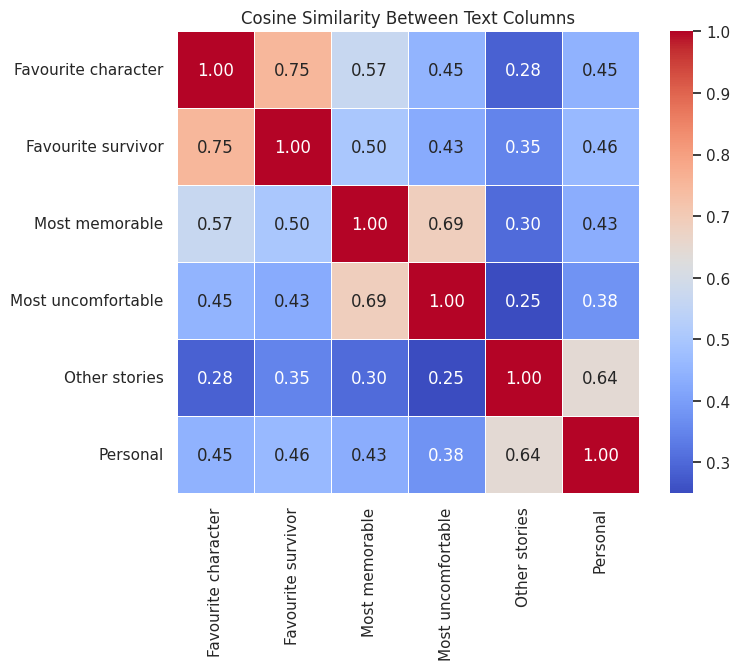

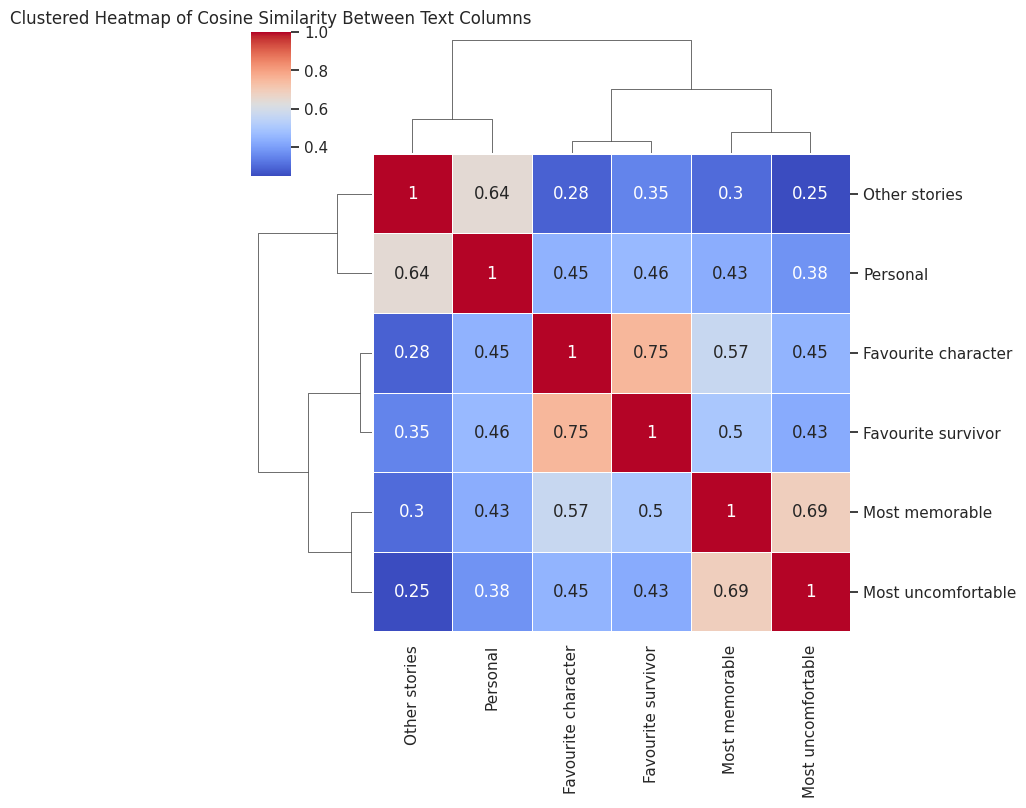

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to analyze
columns_to_analyze = ['Favourite character', 'Favourite survivor', 'Most memorable', 'Most uncomfortable', 'Other stories', 'Personal']

# Combine the text of each column into a single document
column_texts = []
for column in columns_to_analyze:
    combined_text = ' '.join(data[column].dropna().tolist())
    column_texts.append(combined_text)

# Vectorize the combined texts
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(column_texts)

# Compute the similarity matrix between the columns
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=columns_to_analyze, columns=columns_to_analyze)

# Display the similarity matrix
print(similarity_df)


# Plotting the heatmap for the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=.5, fmt=".2f")
plt.title('Cosine Similarity Between Text Columns')
plt.show()

# Plotting a clustered heatmap to see the similarity structure more clearly
sns.clustermap(similarity_df, annot=True, cmap='coolwarm', figsize=(8, 8), metric="cosine", linewidths=.5)
plt.title('Clustered Heatmap of Cosine Similarity Between Text Columns')
plt.savefig('clustered_heatmap.png')
plt.show()



                     Favourite character  Favourite survivor  Most memorable  \
Favourite character             1.000000            0.752370        0.413428   
Favourite survivor              0.752370            1.000000        0.539351   
Most memorable                  0.413428            0.539351        1.000000   
Most uncomfortable              0.377192            0.592431        0.648396   
Other stories                   0.363592            0.381263        0.340124   
Personal                        0.384722            0.381417        0.260368   

                     Most uncomfortable  Other stories  Personal  
Favourite character            0.377192       0.363592  0.384722  
Favourite survivor             0.592431       0.381263  0.381417  
Most memorable                 0.648396       0.340124  0.260368  
Most uncomfortable             1.000000       0.431258  0.372611  
Other stories                  0.431258       1.000000  0.629600  
Personal                       0.3726

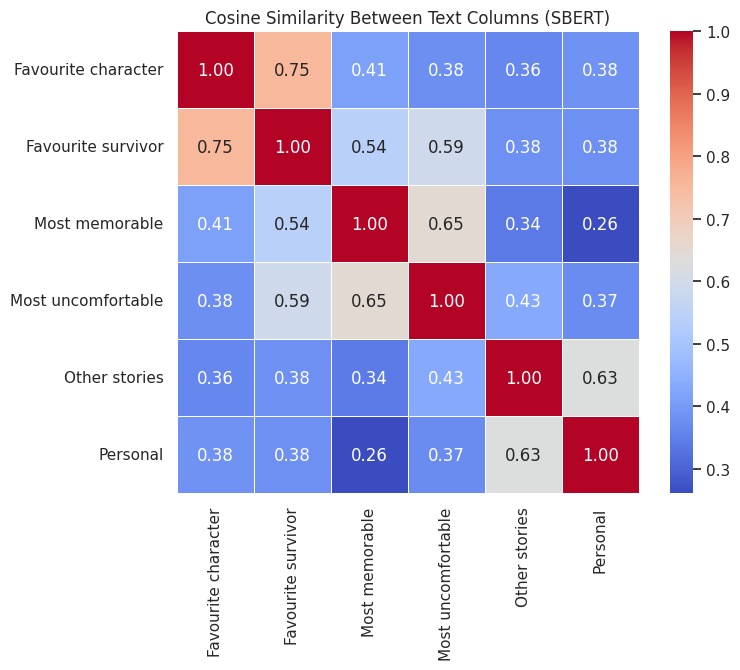

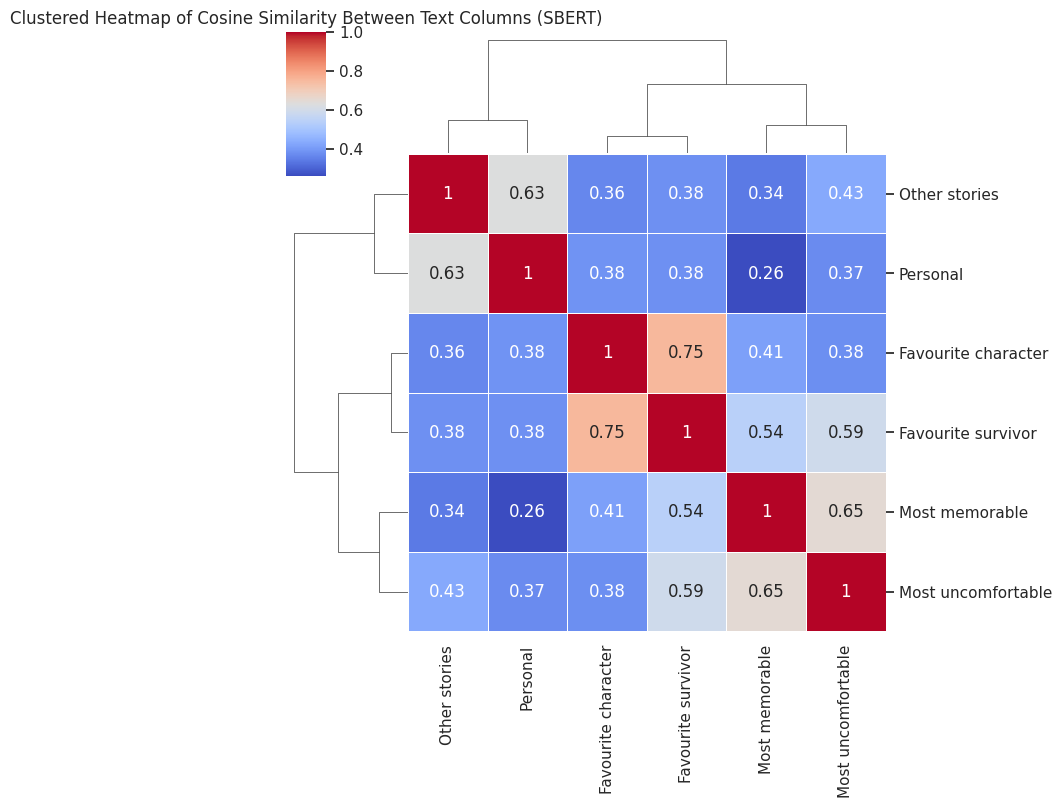

In [51]:
from sentence_transformers import SentenceTransformer, util


# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the columns to analyze
columns_to_analyze = ['Favourite character', 'Favourite survivor', 'Most memorable', 'Most uncomfortable', 'Other stories', 'Personal']

# Combine the text of each column into a single document
column_texts = []
for column in columns_to_analyze:
    combined_text = ' '.join(data[column].dropna().tolist())
    column_texts.append(combined_text)

# Generate embeddings for each column
embeddings = model.encode(column_texts, convert_to_tensor=True)

# Compute cosine similarity between the embeddings
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

# Convert to DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix, index=columns_to_analyze, columns=columns_to_analyze)

# Display the similarity matrix
print(similarity_df)



# Plotting the heatmap for the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=.5, fmt=".2f")
plt.title('Cosine Similarity Between Text Columns (SBERT)')
plt.show()

# Plotting a clustered heatmap to see the similarity structure more clearly
sns.clustermap(similarity_df, annot=True, cmap='coolwarm', figsize=(8, 8), metric="cosine", linewidths=.5)
plt.title('Clustered Heatmap of Cosine Similarity Between Text Columns (SBERT)')
plt.savefig('clustered_heatmap_sbert.png')
plt.show()
